# A Study on the Relationships Between Sentiment Indexes and Bitcoin Price

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Data import

Now i have to import matrix0-1-2 and stuty their time series

In [2]:
import seaborn as sns # Import the seaborn library and assign it the alias 'sns'
import pandas as pd
from IPython import get_ipython
from IPython.display import display

## matrix2

In [1]:
# prompt: UPLOAD THE csv Bitcoin (BTC) 27mar2023-30gen2025 SANTIMENT from my drive at https://drive.google.com/drive/folders/1lQPvAvh4wthmwDpXeVx0qbF2pqaenjeW

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving matrix2.csv to matrix2.csv
User uploaded file "matrix2.csv" with length 62009 bytes


In [2]:
import pandas as pd
from google.colab import files

matrix2 = pd.read_csv('matrix2.csv')
matrix2.head()

date  closing_price  fear_greed_index  pageviews  \
0  2023-03-26   27994.330078              64.0       7367   
1  2023-03-27   27139.888672              64.0       8056   
2  2023-03-28   27268.130859              59.0       8152   
3  2023-03-29   28348.441406              57.0       8703   
4  2023-03-30   28033.562500              60.0       9144   

   ITB Sentiment Score  Bitcoin_Normalized  galaxy_score  santiment  
0            -0.480679           10.847403            42   0.000000  
1            -0.390391           12.613497            42   7.682213  
2            -0.505090           12.263122            42   5.432307  
3            -0.549226           12.613497            42   4.723539  
4            -0.360882           12.438309            42   4.090893

In [ ]:
matrix2.tail()

date  closing_price  fear_greed_index  pageviews  \
668  2025-01-22  103653.070312              84.0      15137   
669  2025-01-23  103960.171875              75.0      15214   
670  2025-01-24  104819.484375              75.0      14508   
671  2025-01-25  104714.648438              75.0      11606   
672  2025-01-26  102682.500000              73.0      11878   

     ITB Sentiment Score  Bitcoin_Normalized  galaxy_score  santiment  
668            -0.217391           16.578489            72   0.145909  
669            -0.424242           18.182859            73   0.899221  
670            -0.387755           16.578489            71  -0.000168  
671            -0.125000           12.834959            70  -0.698534  
672            -0.428571           12.300169            67  -0.649365

In [5]:
matrix2['date'] = pd.to_datetime(matrix2['date'])

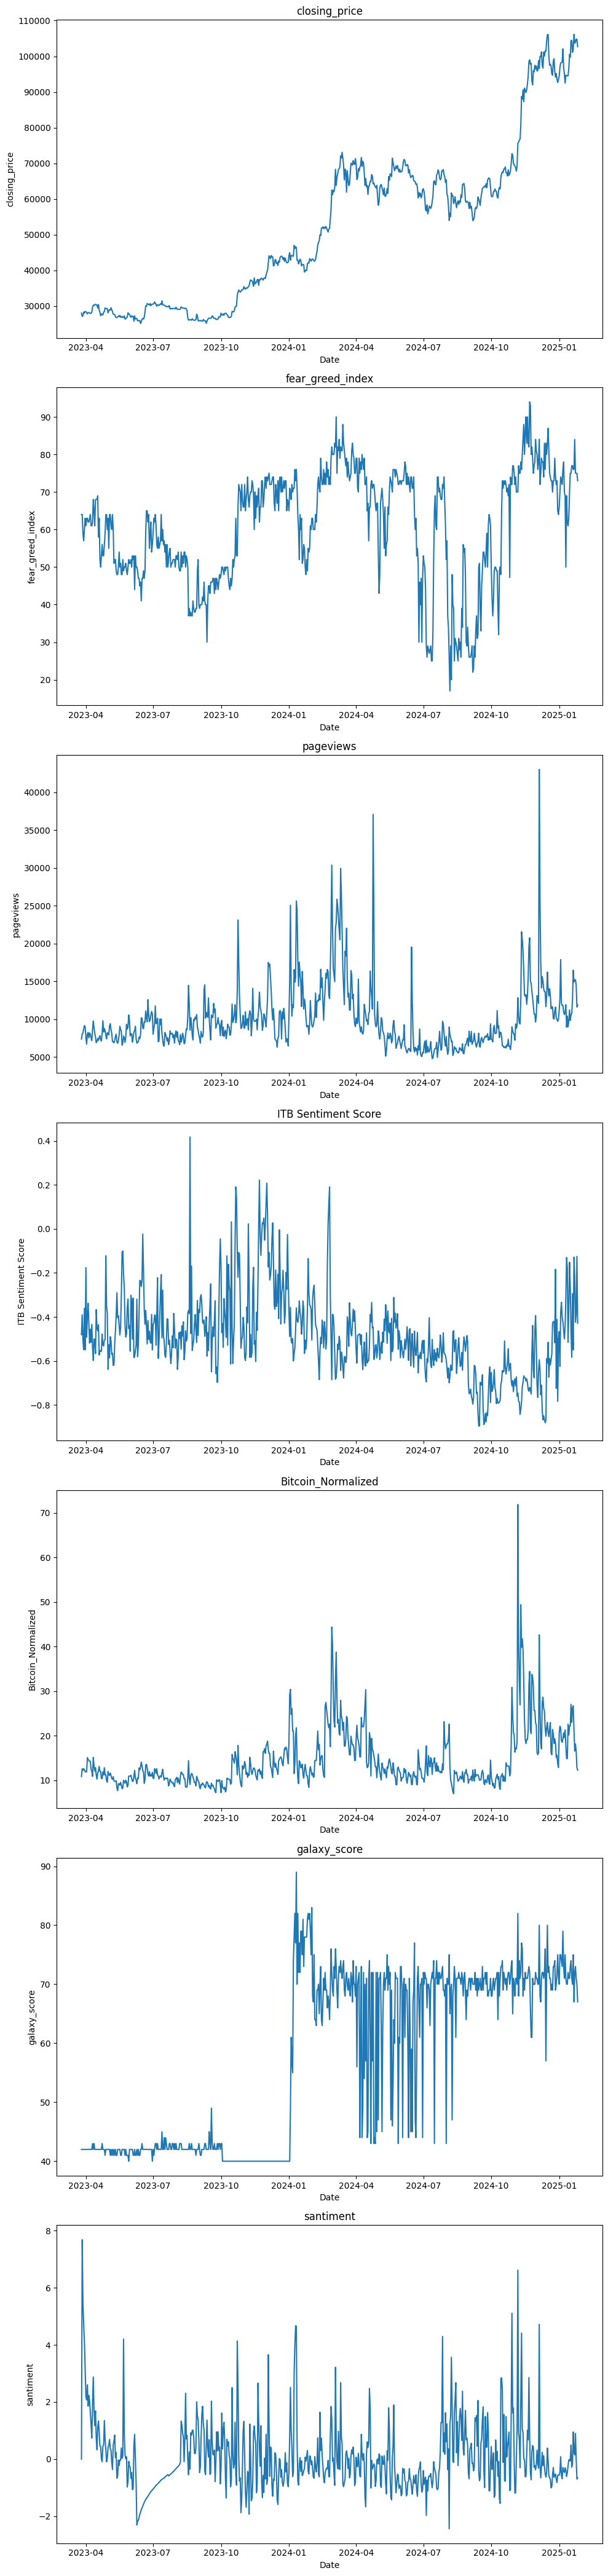

In [6]:
import matplotlib.pyplot as plt

# Assuming matrix2 is your DataFrame and it has a 'date' column
# Replace 'column_name1', 'column_name2', etc. with the actual column names you want to plot
num_columns = len(matrix2.columns) -1 # Assuming the first column is the date column

fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 6 * num_columns))

for i, col in enumerate(matrix2.columns[1:]):  # Iterate from the second column onwards
  axes[i].plot(matrix2['date'], matrix2[col]) # Plot against date
  axes[i].set_title(col) # Set title
  axes[i].set_xlabel('Date') # Set x label
  axes[i].set_ylabel(col) # Set y label


plt.tight_layout()
plt.show()

In [8]:
# prompt: take off the date from the descriptive_stats

# Assuming 'matrix2' DataFrame is already loaded as shown in the provided code.

#Remove the date column before calculating descriptive statistics
matrix2_no_date = matrix2.drop(columns=['date'])

# Calculate descriptive statistics without the date column
descriptive_stats = matrix2_no_date.describe()

descriptive_stats


closing_price  fear_greed_index    pageviews  ITB Sentiment Score  \
count     673.000000        673.000000    673.00000           673.000000   
mean    52556.343074         60.703153  10021.51263            -0.481985   
std     22600.127642         15.018567   4227.72949             0.189954   
min     25124.675781         17.000000   4785.00000            -0.896174   
25%     29765.492188         50.000000   7367.00000            -0.593732   
50%     52284.875000         64.000000   8963.00000            -0.505344   
75%     66710.156250         73.000000  11183.00000            -0.398923   
max    106146.265625         94.000000  43027.00000             0.417580   

       Bitcoin_Normalized  galaxy_score   santiment  
count          673.000000    673.000000  673.000000  
mean            14.376828     57.243685    0.093268  
std              6.462558     14.748892    1.206264  
min              7.018147     40.000000   -2.439782  
25%             10.444069     42.000000   -0.655053  
50%             12.122642     63.000000   -0.157224  
75%             16.414113     71.000000    0.571602  
max             71.888112     89.000000    7.682213

# Step 2: Correlation analysis

                     closing_price  fear_greed_index  pageviews  \
closing_price             1.000000          0.471164   0.254359   
fear_greed_index          0.471164          1.000000   0.477420   
pageviews                 0.254359          0.477420   1.000000   
ITB Sentiment Score      -0.365407          0.060554   0.045126   
Bitcoin_Normalized        0.531530          0.539746   0.587764   
galaxy_score              0.753406          0.192032   0.209467   
santiment                -0.037021         -0.027194   0.179324   

                     ITB Sentiment Score  Bitcoin_Normalized  galaxy_score  \
closing_price                  -0.365407            0.531530      0.753406   
fear_greed_index                0.060554            0.539746      0.192032   
pageviews                       0.045126            0.587764      0.209467   
ITB Sentiment Score             1.000000           -0.158533     -0.419601   
Bitcoin_Normalized             -0.158533            1.000000      0.39183

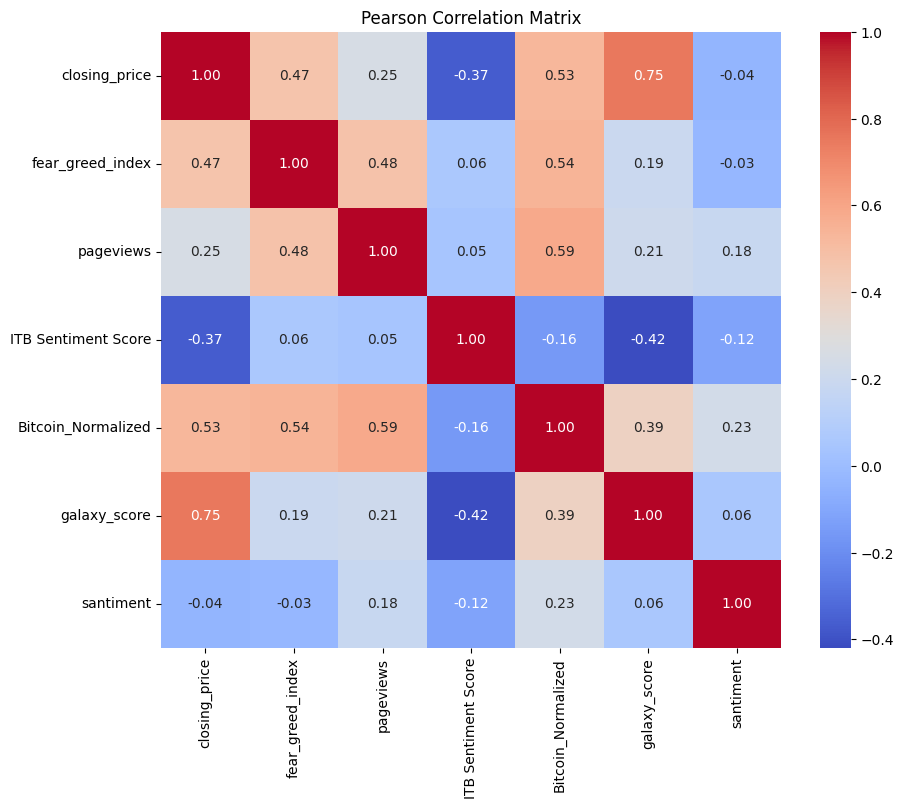

In [7]:
# prompt: do the pearson correlation on matrix2 excluding the date

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming matrix2 is your DataFrame and it has a 'date' column
# Remove the 'date' column
matrix2_no_date = matrix2.drop('date', axis=1)

# Calculate the Pearson correlation
correlation_matrix = matrix2_no_date.corr(method='pearson')

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

                     closing_price  fear_greed_index  pageviews  \
closing_price             1.000000          0.632179   0.167100   
fear_greed_index          0.632179          1.000000   0.505717   
pageviews                 0.167100          0.505717   1.000000   
ITB Sentiment Score      -0.391822         -0.007133   0.164346   
Bitcoin_Normalized        0.586566          0.670377   0.518280   
galaxy_score              0.695194          0.240749   0.083626   
santiment                -0.064031         -0.066950   0.076698   

                     ITB Sentiment Score  Bitcoin_Normalized  galaxy_score  \
closing_price                  -0.391822            0.586566      0.695194   
fear_greed_index               -0.007133            0.670377      0.240749   
pageviews                       0.164346            0.518280      0.083626   
ITB Sentiment Score             1.000000           -0.098236     -0.430658   
Bitcoin_Normalized             -0.098236            1.000000      0.34604

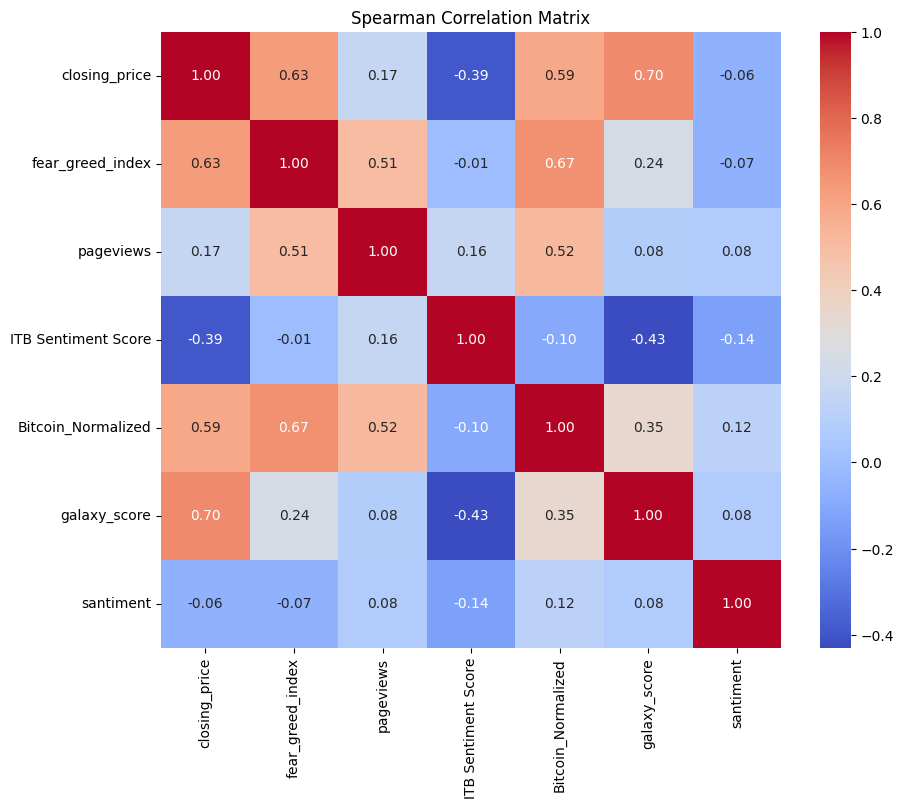

In [9]:
# prompt: do the spearmann correlation on matrix2 excluding the date

# Assuming matrix2 is your DataFrame and it has a 'date' column
# Remove the 'date' column
matrix2_no_date = matrix2.drop('date', axis=1)

# Calculate the Spearman correlation
spearman_correlation_matrix = matrix2_no_date.corr(method='spearman')

# Display the correlation matrix
print(spearman_correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()


                     closing_price  fear_greed_index  pageviews  \
closing_price             1.000000          0.551671   0.210730   
fear_greed_index          0.551671          1.000000   0.491568   
pageviews                 0.210730          0.491568   1.000000   
ITB Sentiment Score      -0.378614          0.026711   0.104736   
Bitcoin_Normalized        0.559048          0.605062   0.553022   
galaxy_score              0.724300          0.216391   0.146546   
santiment                -0.050526         -0.047072   0.128011   

                     ITB Sentiment Score  Bitcoin_Normalized  galaxy_score  \
closing_price                  -0.378614            0.559048      0.724300   
fear_greed_index                0.026711            0.605062      0.216391   
pageviews                       0.104736            0.553022      0.146546   
ITB Sentiment Score             1.000000           -0.128385     -0.425129   
Bitcoin_Normalized             -0.128385            1.000000      0.36894

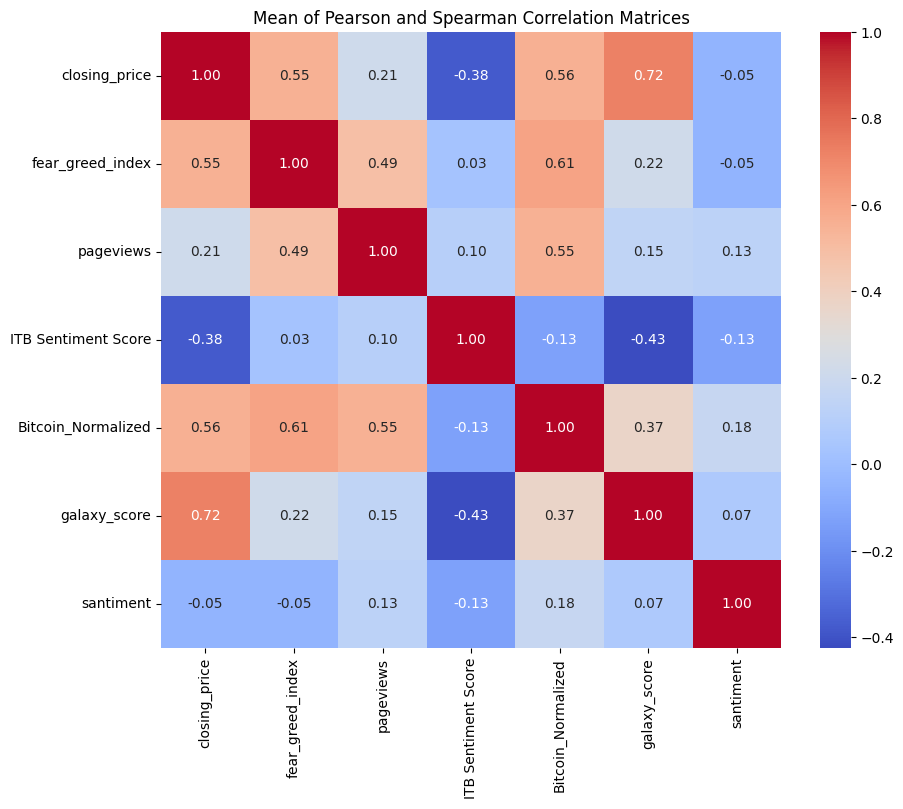

In [10]:
# prompt: do the mean of pearson and spearmann correlation matrixes

# Calculate the mean of the Pearson and Spearman correlation matrices
mean_correlation_matrix = (correlation_matrix + spearman_correlation_matrix) / 2

# Display the mean correlation matrix
print(mean_correlation_matrix)

# Plot the heatmap for the mean correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(mean_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mean of Pearson and Spearman Correlation Matrices')
plt.show()


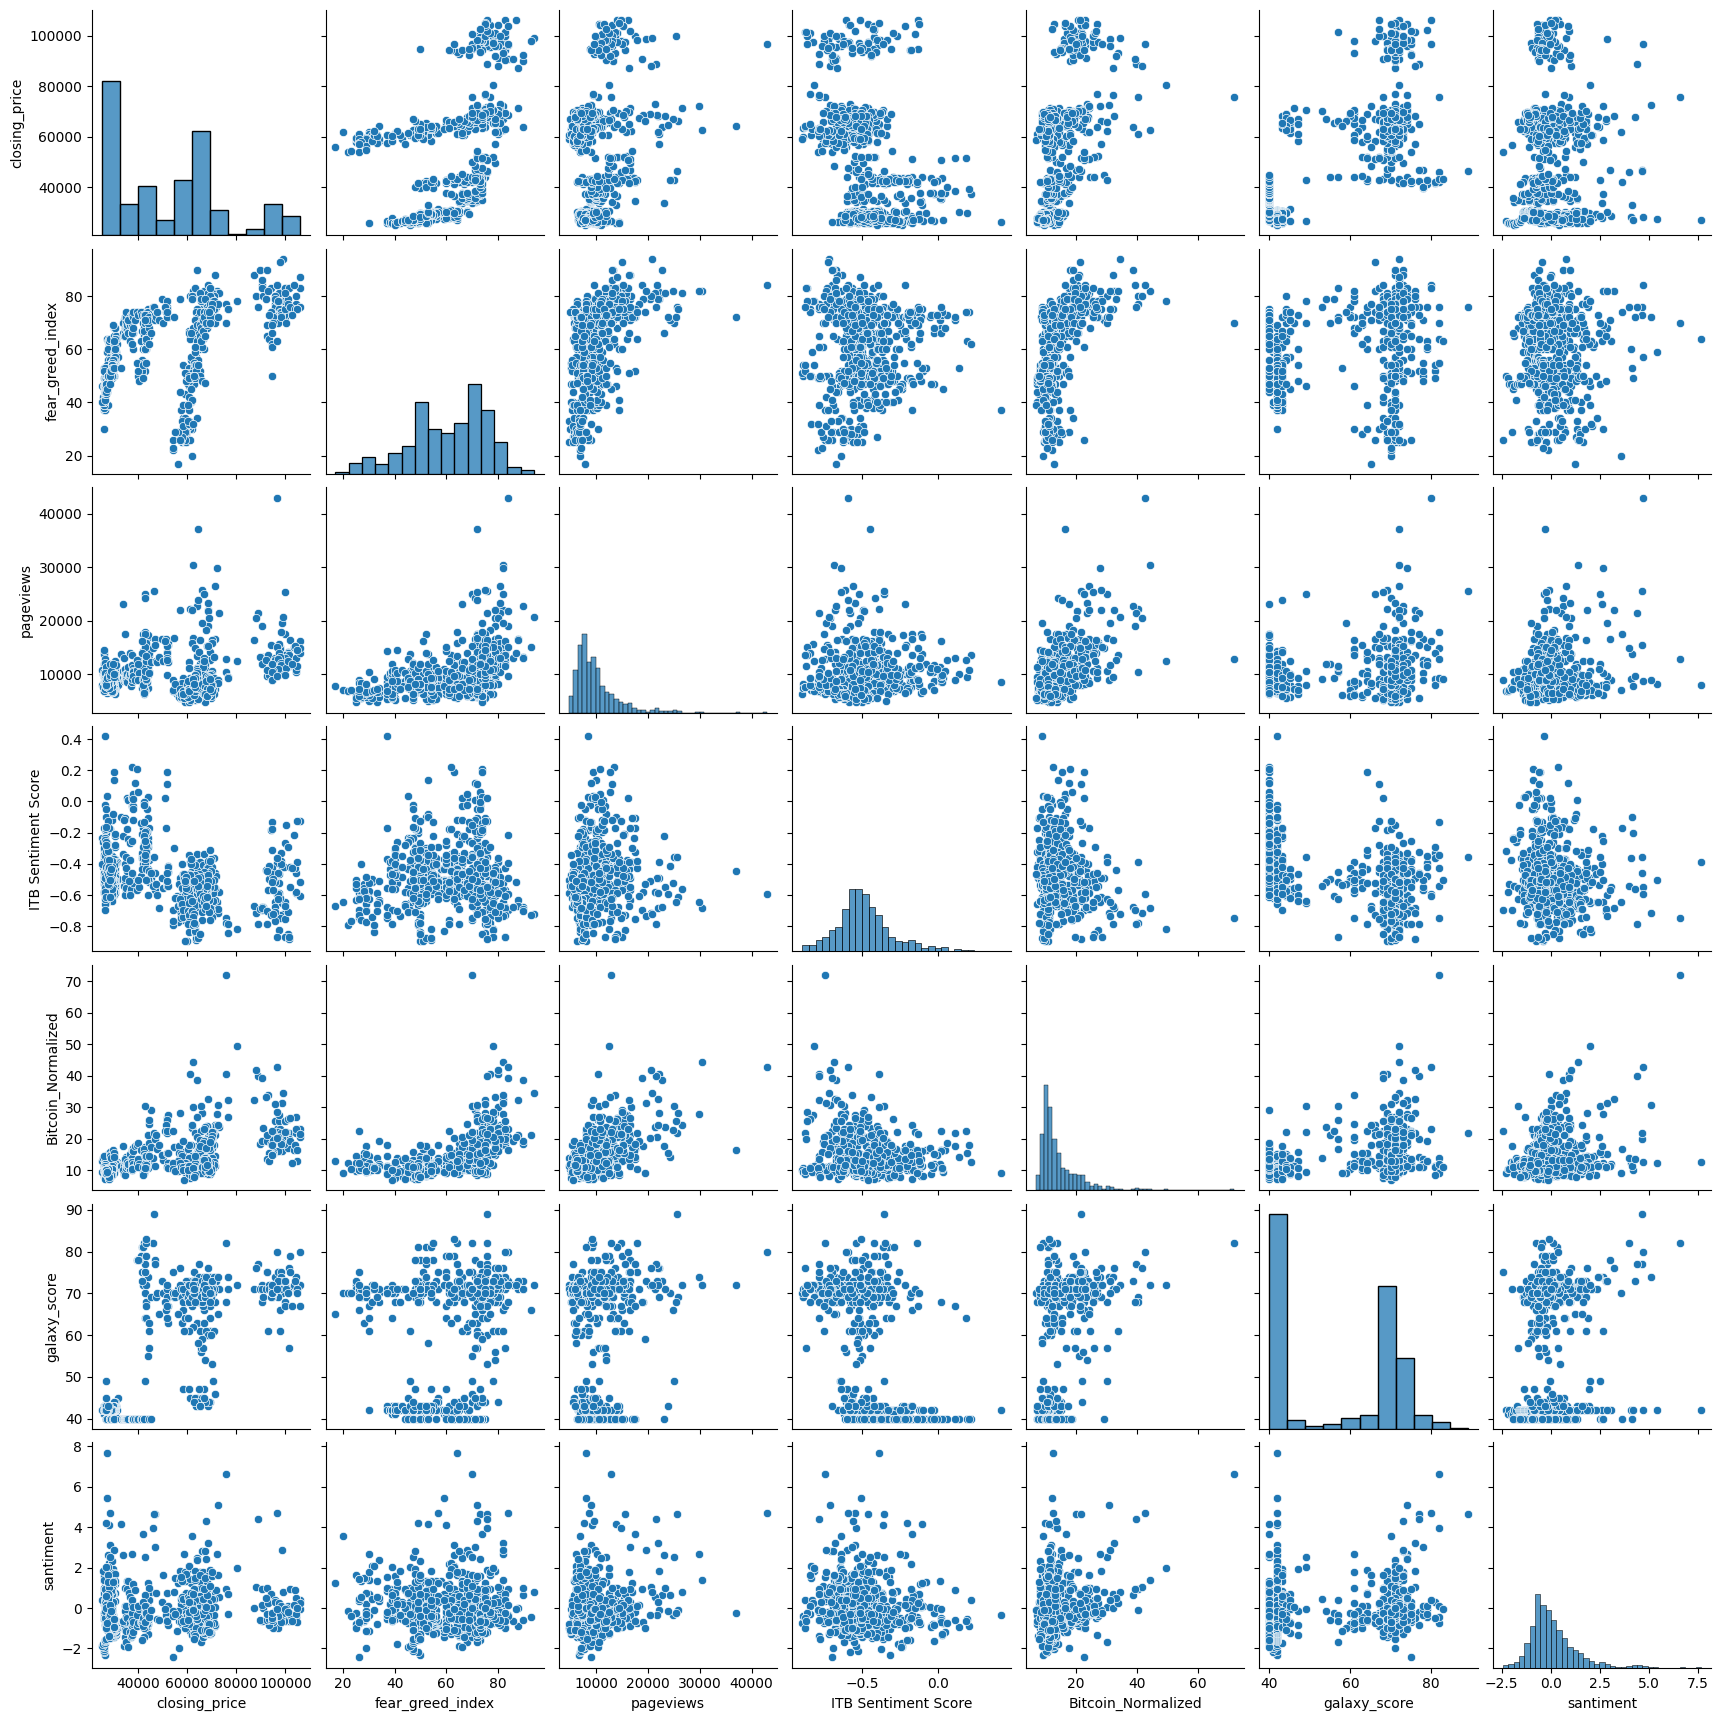

In [ ]:
# prompt: do pairwise scatterplot in a matrix setting

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'matrix2_no_date' DataFrame is already loaded and has the data without the date column

# Create the pairwise scatterplot matrix
sns.pairplot(matrix2_no_date)
plt.show()


# Step 3: Econometric framework

In [ ]:
import pandas as pd
from google.colab import files

matrix2 = pd.read_csv('matrix1.csv')
matrix2.head()

date  closing_price  fear_greed_index  pageviews  \
0  2021-06-18   35787.246094              25.0      18044   
1  2021-06-19   35615.871094              23.0      15534   
2  2021-06-20   35698.296875              21.0      15696   
3  2021-06-21   31676.693359              23.0      19225   
4  2021-06-22   32505.660156              10.0      21093   

   ITB Sentiment Score  Bitcoin_Normalized  galaxy_score  
0            -0.638211           26.707843            61  
1            -0.592391           24.279857            71  
2            -0.613527           27.921836            58  
3            -0.671053           21.566434            67  
4            -0.738791           29.653846            72

In [ ]:
matrix2.describe()

closing_price  fear_greed_index     pageviews  ITB Sentiment Score  \
count    1314.000000       1314.000000   1314.000000          1314.000000   
mean    43148.441105         48.134872  13410.456621            -0.443808   
std     21023.570489         21.251884   7264.047519             0.241174   
min     15787.284180          6.000000   4785.000000            -0.896174   
25%     26678.235840         27.000000   8440.250000            -0.594224   
50%     39453.376953         50.000000  10781.500000            -0.484486   
75%     59117.727539         69.000000  16196.500000            -0.356822   
max    106146.265625         94.000000  83841.000000             0.748627   

       Bitcoin_Normalized  galaxy_score  
count         1314.000000   1314.000000  
mean            15.598462     57.017504  
std              6.520249     12.966434  
min              7.018147     40.000000  
25%             11.011242     44.000000  
50%             13.713876     58.000000  
75%             18.623914     70.000000  
max             71.888112     89.000000

## ADF tests

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [13]:
for col in matrix2.columns:
  if col != 'date':
    print(f"Performing ADF test on column: {col}")
    adf_test(matrix2[col])
    print("-" * 30) # Separator between test results

    # Interpretation of ADF test results
    result = adfuller(matrix2[col])
    p_value = result[1]
    if p_value < 0.05:
      print(f"The time series in column '{col}' is likely stationary.")
    else:
      print(f"The time series in column '{col}' is likely non-stationary.")
    print("-" * 30)


Performing ADF test on column: closing_price
Results of Dickey-Fuller Test:
Test Statistic                   0.477724
p-value                          0.984180
#Lags Used                       6.000000
Number of Observations Used    666.000000
Critical Value (1%)             -3.440207
Critical Value (5%)             -2.865889
Critical Value (10%)            -2.569086
dtype: float64
------------------------------
The time series in column 'closing_price' is likely non-stationary.
------------------------------
Performing ADF test on column: fear_greed_index
Results of Dickey-Fuller Test:
Test Statistic                  -3.767510
p-value                          0.003258
#Lags Used                       1.000000
Number of Observations Used    671.000000
Critical Value (1%)             -3.440133
Critical Value (5%)             -2.865857
Critical Value (10%)            -2.569069
dtype: float64
------------------------------
The time series in column 'fear_greed_index' is likely stationary.

## Cointegration tests

### BTX vs FNG

In [14]:
from statsmodels.tsa.stattools import coint


# Perform the cointegration test
coint_result = coint(matrix2['closing_price'], matrix2['fear_greed_index'])

In [15]:
# Print the results
print(coint_result)

t_stat = coint_result[0]
p_value = coint_result[1]
critical_values = coint_result[2]

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Critical Values (1%, 5%, 10%): {critical_values}")

if p_value < 0.05:
    print("The series are likely cointegrated.")
else:
    print("The series are likely not cointegrated.")


(-0.5400965376990764, 0.961351471445287, array([-3.91281171, -3.34523752, -3.05076733]))
t-statistic: -0.5400965376990764
p-value: 0.961351471445287
Critical Values (1%, 5%, 10%): [-3.91281171 -3.34523752 -3.05076733]
The series are likely not cointegrated.


### BTX vs Galaxy Score

In [16]:
from statsmodels.tsa.stattools import coint


# Perform the cointegration test
coint_result = coint(matrix2['closing_price'], matrix2['galaxy_score'])

In [17]:
# Print the results
print(coint_result)

t_stat = coint_result[0]
p_value = coint_result[1]
critical_values = coint_result[2]

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Critical Values (1%, 5%, 10%): {critical_values}")

if p_value < 0.05:
    print("The series are likely cointegrated.")
else:
    print("The series are likely not cointegrated.")


(-1.924915979664954, 0.5673184216327569, array([-3.91281171, -3.34523752, -3.05076733]))
t-statistic: -1.924915979664954
p-value: 0.5673184216327569
Critical Values (1%, 5%, 10%): [-3.91281171 -3.34523752 -3.05076733]
The series are likely not cointegrated.


### BTX vs Google Trends

In [18]:
from statsmodels.tsa.stattools import coint


# Perform the cointegration test
coint_result = coint(matrix2['closing_price'], matrix2['Bitcoin_Normalized'])

In [19]:
# Print the results
print(coint_result)

t_stat = coint_result[0]
p_value = coint_result[1]
critical_values = coint_result[2]

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Critical Values (1%, 5%, 10%): {critical_values}")

if p_value < 0.05:
    print("The series are likely cointegrated.")
else:
    print("The series are likely not cointegrated.")


(-0.6803243152537052, 0.9487200125191252, array([-3.91281171, -3.34523752, -3.05076733]))
t-statistic: -0.6803243152537052
p-value: 0.9487200125191252
Critical Values (1%, 5%, 10%): [-3.91281171 -3.34523752 -3.05076733]
The series are likely not cointegrated.


## Split Train-Test

In [20]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(matrix2, test_size=0.2, shuffle=False) # Use train_test_split for splitting
print(train_data.shape)
test_data.shape

(538, 8)


(135, 8)

## Benchmark model: autoregressive model

In [22]:
# Fit the autoregressive model to the training data
model = AutoReg(train_data['closing_price'], lags=1)  # Adjust lags as needed
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(matrix2)-1)

In [23]:
import numpy as np # linear algebra
# Evaluate the model
# rmse = mean_squared_error(test_data['closing_price'], predictions, squared=False) # Original line causing the error
rmse = np.sqrt(mean_squared_error(test_data['closing_price'], predictions)) # Calculate RMSE manually
print(f"RMSE: {rmse}")

RMSE: 27883.469504585093


In [24]:
# prompt: calculate the mape

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test_data['closing_price'], predictions)
print(f"MAPE: {mape}")


MAPE: 0.2447416738296745


After the benchmark with AR we have to test ARDL and after GRU

## ARDL Modelling and FORECASTING

### Fear and Greed Index

In [25]:
# prompt: now lets train an ardl model on train_data to forecast closing_prices using fear_greed_index as exogenous variable
from statsmodels.tsa.ardl import ardl_select_order
from statsmodels.tsa.ardl import ARDL
from sklearn.metrics import mean_squared_error

# Assuming 'train_data' is your DataFrame and it has 'closing_price' and 'fear_greed_index' columns
# and you have already performed necessary data preprocessing and stationarity checks.


# Define the exogenous variable
exog = train_data[["fear_greed_index"]]

# Determine optimal ARDL order (you might need to adjust the maxlags)
sel_res = ardl_select_order(train_data.closing_price, 8, exog.loc[train_data.index], 8, ic="aic", trend="c", causal=True)

print(f"The optimal order is: {sel_res.model.ardl_order}")

The optimal order is: (2, 2)


In [26]:
# Fit ARDL model on training data
model = ARDL(train_data.closing_price, sel_res.model.ardl_order[0], exog.loc[train_data.index], sel_res.model.ardl_order[1])
ardl_model = model.fit()
print(ardl_model.summary())

                              ARDL Model Results                              
Dep. Variable:          closing_price   No. Observations:                  538
Model:                     ARDL(2, 2)   Log Likelihood               -4598.094
Method:               Conditional MLE   S.D. of innovations           1286.390
Date:                Mon, 10 Mar 2025   AIC                           9210.188
Time:                        18:21:56   BIC                           9240.177
Sample:                             2   HQIC                          9221.920
                                  538                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 299.9390    250.343      1.198      0.231    -191.847     791.725
closing_price.L1        0.8547      0.058     14.797      0.000       0.741       0.968
closing_price.L2

In [27]:
# Make predictions using the fitted ARDL model
# Assuming 'data' is the original DataFrame you split into train_data and test_data

#Original: predictions = ardl_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=test_data[['fear_greed_index']]) # Pass exog as a DataFrame

# Pass test_data[['fear_greed_index']] as exog_oos to predict out-of-sample
predictions = ardl_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog_oos=test_data[['fear_greed_index']])

In [28]:
# prompt: calculate the rmse of the predictions on the test:_data

rmse = np.sqrt(mean_squared_error(test_data['closing_price'], predictions))
print(f"RMSE: {rmse}")

RMSE: 26373.028990951007


In [ ]:
# prompt: try another error measure like mape

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test_data['closing_price'], predictions)
print(f"MAPE: {mape}")


MAPE: 0.2249255019045726


### Lunar Crush

In [29]:
# prompt: now lets train an ardl model on train_data to forecast closing_prices using fear_greed_index as exogenous variable
from statsmodels.tsa.ardl import ardl_select_order
from statsmodels.tsa.ardl import ARDL
from sklearn.metrics import mean_squared_error

# Assuming 'train_data' is your DataFrame and it has 'closing_price' and 'fear_greed_index' columns
# and you have already performed necessary data preprocessing and stationarity checks.


# Define the exogenous variable
exog = train_data[["galaxy_score"]]

# Determine optimal ARDL order (you might need to adjust the maxlags)
sel_res = ardl_select_order(train_data.closing_price, 8, exog.loc[train_data.index], 8, ic="aic", trend="c", causal=True)
print(f"The optimal order is: {sel_res.model.ardl_order}")

# Fit ARDL model on training data
model = ARDL(train_data.closing_price, sel_res.model.ardl_order[0], exog.loc[train_data.index], sel_res.model.ardl_order[1])
ardl_model = model.fit()
print(ardl_model.summary())

The optimal order is: (2, 3)
                              ARDL Model Results                              
Dep. Variable:          closing_price   No. Observations:                  538
Model:                     ARDL(2, 3)   Log Likelihood               -4595.435
Method:               Conditional MLE   S.D. of innovations           1280.024
Date:                Mon, 10 Mar 2025   AIC                           9206.870
Time:                        18:22:40   BIC                           9241.143
Sample:                             3   HQIC                          9220.278
                                  538                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -157.4986    228.194     -0.690      0.490    -605.775     290.778
closing_price.L1     0.8892      0.043     20.560      0.000       0.804       0.974

In [30]:
# Make predictions using the fitted ARDL model
# Assuming 'data' is the original DataFrame you split into train_data and test_data

#Original: predictions = ardl_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=test_data[['fear_greed_index']]) # Pass exog as a DataFrame

# Pass test_data[['fear_greed_index']] as exog_oos to predict out-of-sample
predictions = ardl_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog_oos=test_data[['galaxy_score']])

In [31]:
# prompt: calculate the rmse of the predictions on the test:_data

rmse = np.sqrt(mean_squared_error(test_data['closing_price'], predictions))
print(f"RMSE: {rmse}")

RMSE: 23706.646433691643


In [ ]:
# prompt: try another error measure like mape

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test_data['closing_price'], predictions)
print(f"MAPE: {mape}")


MAPE: 0.20315984736696052


### *Google Trends Index*

In [32]:
# prompt: now lets train an ardl model on train_data to forecast closing_prices using fear_greed_index as exogenous variable
from statsmodels.tsa.ardl import ardl_select_order
from statsmodels.tsa.ardl import ARDL
from sklearn.metrics import mean_squared_error

# Assuming 'train_data' is your DataFrame and it has 'closing_price' and 'fear_greed_index' columns
# and you have already performed necessary data preprocessing and stationarity checks.


# Define the exogenous variable
exog = train_data[["Bitcoin_Normalized"]]

# Determine optimal ARDL order (you might need to adjust the maxlags)
sel_res = ardl_select_order(train_data.closing_price, 8, exog.loc[train_data.index], 8, ic="aic", trend="c", causal=True)
print(f"The optimal order is: {sel_res.model.ardl_order}")

# Fit ARDL model on training data
model = ARDL(train_data.closing_price, sel_res.model.ardl_order[0], exog.loc[train_data.index], sel_res.model.ardl_order[1])
ardl_model = model.fit()
print(ardl_model.summary())

The optimal order is: (2, 5)
                              ARDL Model Results                              
Dep. Variable:          closing_price   No. Observations:                  538
Model:                     ARDL(2, 5)   Log Likelihood               -4590.629
Method:               Conditional MLE   S.D. of innovations           1268.598
Date:                Mon, 10 Mar 2025   AIC                           9201.258
Time:                        18:31:01   BIC                           9244.099
Sample:                             5   HQIC                          9218.019
                                  538                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -127.1475    198.997     -0.639      0.523    -518.072     263.777
closing_price.L1          0.8749      0.043     20.168      0.000    

In [33]:
# Make predictions using the fitted ARDL model
# Assuming 'data' is the original DataFrame you split into train_data and test_data

#Original: predictions = ardl_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=test_data[['fear_greed_index']]) # Pass exog as a DataFrame

# Pass test_data[['fear_greed_index']] as exog_oos to predict out-of-sample
predictions = ardl_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog_oos=test_data[['Bitcoin_Normalized']])

In [34]:
# prompt: calculate the rmse of the predictions on the test:_data

rmse = np.sqrt(mean_squared_error(test_data['closing_price'], predictions))
print(f"RMSE: {rmse}")

RMSE: 20752.57232357195


In [35]:
# prompt: try another error measure like mape

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test_data['closing_price'], predictions)
print(f"MAPE: {mape}")


MAPE: 0.20944691940055554


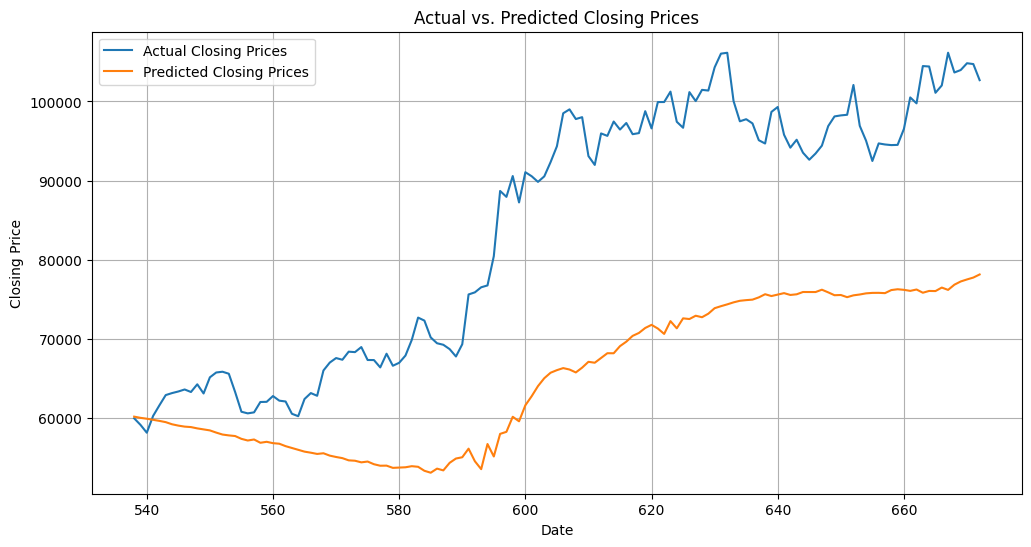

In [36]:
# prompt: plot the predictions and the actual closing prices

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['closing_price'], label='Actual Closing Prices')
plt.plot(test_data.index, predictions, label='Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.show()


# Step 4: Machine Learning Forecasting

In [20]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Anche qui forse conviene fare benchmark con solo closing pricess...

In [25]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(matrix2, test_size=0.2, shuffle=False) # Use train_test_split for splitting
print(train_data.shape)
test_data.shape

(538, 8)


(135, 8)

In [34]:
# prompt: lets create a gru bevchmark model thet predict using only the cxlosing_price

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Assuming 'matrix2' DataFrame is already loaded and preprocessed
# ... (Your existing code to load and preprocess data)

# Prepare data for GRU
data = matrix2[['closing_price']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split into train and test
train_size = int(len(data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for GRU
def create_sequences(data, seq_length):
  xs = []
  ys = []
  for i in range(len(data)-seq_length-1):
    x = data[i:(i+seq_length)]
    y = data[i+seq_length]
    xs.append(x)
    ys.append(y)
  return np.array(xs), np.array(ys)

seq_length = 20  # Adjust sequence length as needed
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32) # Adjust epochs and batch_size as needed

# Make predictions
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), predicted_price))
print(f'RMSE: {rmse}')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0570
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0036
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0013
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.0807e-04
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.9561e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.7320e-04
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.0323e-04
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5.2722e-04
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 5.0690e-04
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.4226e-04
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 4.7208e-04
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9223e-04
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8247e-04
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5449e-04
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━

In [35]:
from sklearn.metrics import mean_absolute_percentage_error

In [36]:
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), predicted_price)
print(f"MAPE: {mape}")

MAPE: 0.02788000139225589


Stesso RMSE di prima...

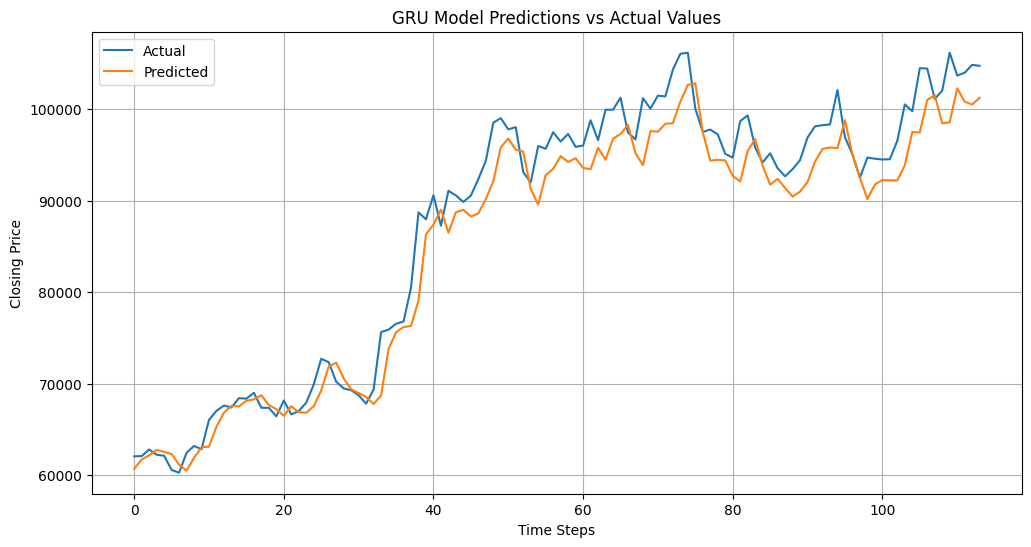

In [37]:
# prompt: make a plot of the predictions to compare with actual values

# Import necessary library
import matplotlib.pyplot as plt

# ... (Your existing code to load, preprocess data, and train the GRU model)

# Assuming 'scaler' is your MinMaxScaler and 'y_test' is the scaled test data
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test and inverse transform to get actual values


# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predicted_price, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.title('GRU Model Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

Devo prendere orizzonte temporale per previsione sempre uguale altrimenti come faccio a confrontare previsioni?????????????

## Stesso procedimento per Fear and Greed

In [38]:
# prompt: now add to the previous gru model fear_greed_index data to see if the performance improve

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Assuming 'matrix2' DataFrame is already loaded and preprocessed
# ... (Your existing code to load and preprocess data)

# Prepare data for GRU, including 'fear_greed_index'
data = matrix2[['closing_price', 'fear_greed_index']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split into train and test
train_size = int(len(data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for GRU
def create_sequences(data, seq_length):
  xs = []
  ys = []
  for i in range(len(data)-seq_length-1):
    x = data[i:(i+seq_length)]
    y = data[i+seq_length, 0] # Predict only closing price
    xs.append(x)
    ys.append(y)
  return np.array(xs), np.array(ys)

seq_length = 20  # Adjust sequence length as needed
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(GRU(units=50))
model.add(Dense(units=1)) # Output layer for closing price
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32) # Adjust epochs and batch_size as needed

# Make predictions
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(np.concatenate((predicted_price, x_test[:,-1,1:]), axis=1))[:,0] # Inverse transform and get only closing price

# Evaluate the model
# Extract the original closing prices from the scaled test data
original_closing_prices = scaler.inverse_transform(x_test.reshape(-1, x_test.shape[-1]))[:, 0].reshape(-1, seq_length)[:, -1]  # Reshape and select closing prices

rmse = np.sqrt(mean_squared_error(original_closing_prices, predicted_price))  # Calculate RMSE using original and predicted closing prices
print(f'RMSE: {rmse}')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0442
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0014
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.8556e-04
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.4566e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0006e-04
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.6854e-04
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.3660e-04
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.0626e-04
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8090e-04
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8188e-04
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.1235e-04
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1685e-04
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9884e-04
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━

In [41]:
# prompt: original_closing_prices count

print(len(original_closing_prices))


114


Così l'errore è molto più piccolo... forse anche troppo...

In [39]:
# prompt: count predicted_price

# Count the number of elements in the predicted_price array
count_predicted_price = len(predicted_price)
print(f"Number of predicted prices: {count_predicted_price}")


Number of predicted prices: 114


Perchè 114 e quelli del bench 135?

In [27]:
mape = mean_absolute_percentage_error(original_closing_prices, predicted_price)
print(f"MAPE: {mape}")

MAPE: 0.010472991195346228


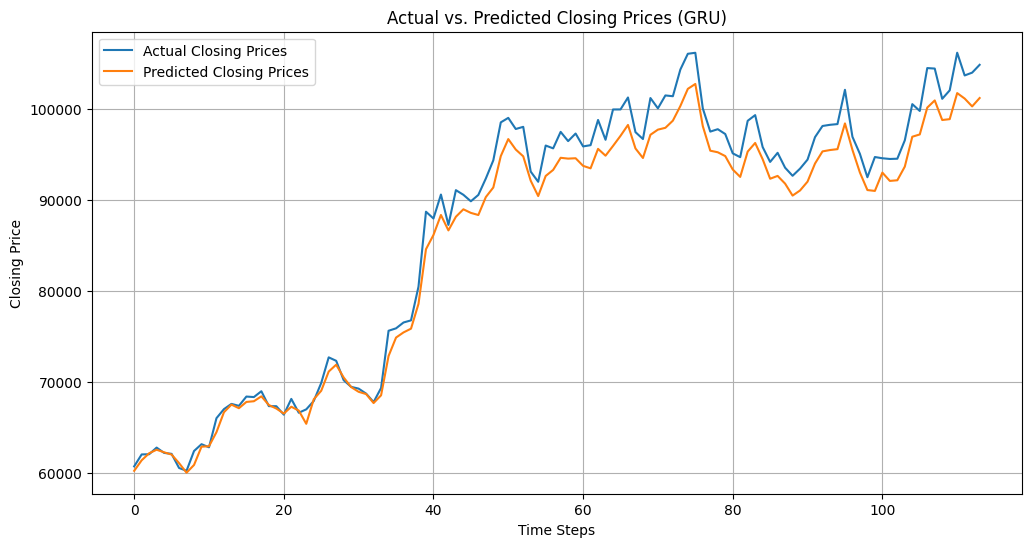

In [42]:
# prompt: plot original_closing_prices and predicted_price together to compare

# Assuming original_closing_prices and predicted_price are already defined

plt.figure(figsize=(12, 6))
plt.plot(original_closing_prices, label='Actual Closing Prices')
plt.plot(predicted_price, label='Predicted Closing Prices')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Closing Prices (GRU)')
plt.legend()
plt.grid(True)
plt.show()


### Fear and Greed Index

In [58]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(matrix2, test_size=0.2, shuffle=False) # Use train_test_split for splitting
print(train_data.shape)
test_data.shape

(538, 8)


(135, 8)

In [59]:
# prompt:  now lets train a GRU model on train_data to forecast closing_prices using fear_greed_index as exogenous variable

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Assuming train_data is your DataFrame with 'closing_price' and 'fear_greed_index'
# Prepare the data for the GRU model

# 1. Scale the data
scaler = MinMaxScaler()
train_data[['closing_price', 'fear_greed_index']] = scaler.fit_transform(train_data[['closing_price', 'fear_greed_index']])


# 2. Create sequences for the GRU
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length, 0]  # Predict closing price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 20 # Example sequence length. Adjust as needed
X_train, y_train = create_sequences(train_data[['closing_price', 'fear_greed_index']].values, seq_length)

# 3. Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(units=50))
model.add(Dense(units=1))  # Output layer for closing price prediction

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the GRU model
model.fit(X_train, y_train, epochs=50, batch_size=32) # Adjust epochs and batch size as needed

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1683
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0106
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0045
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0013
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0014
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0016
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0013
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0013
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0012
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0012
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012
Epoch 16/50
17/

In [60]:
# prompt: now lets do the predictions with the gru on test_data and evaluate the results with rmse

# Assuming test_data is your DataFrame and the GRU model is already trained.
# Also, assuming 'scaler' is the MinMaxScaler used for training data.

# 1. Prepare the test data
test_data[['closing_price', 'fear_greed_index']] = scaler.transform(test_data[['closing_price', 'fear_greed_index']])

# 2. Create sequences for the test data
X_test, y_test = create_sequences(test_data[['closing_price', 'fear_greed_index']].values, seq_length)

# 3. Make predictions
gru_predictions = model.predict(X_test)

# 4. Inverse transform the predictions to the original scale
# Fix: Adjust the slicing of test_data[['fear_greed_index']] to match gru_predictions shape
gru_predictions = scaler.inverse_transform(np.concatenate((gru_predictions, test_data[['fear_greed_index']].iloc[seq_length:seq_length + len(gru_predictions)].values), axis=1))[:,0]


# 5. Evaluate the model (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,gru_predictions))

print(f"GRU RMSE: {rmse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
GRU RMSE: 85557.85657806246


In [62]:
# prompt: calculate mape

mape = mean_absolute_percentage_error(y_test,gru_predictions)
print(f"MAPE: {mape}")


MAPE: 66662.07321096459


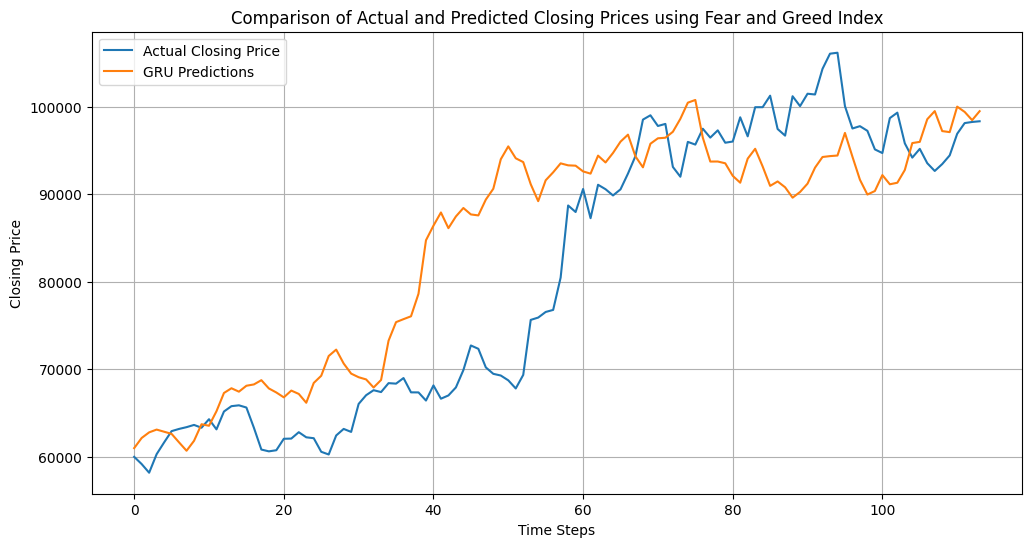

In [63]:
# prompt: plot gru_predictions test_data closing_price to make a comparison of the two series, both in the same graph after rescaling the closing prices to their original values for the same time interval

# Assuming 'gru_predictions', 'test_data', and 'scaler' are defined as in your provided code.

# Extract the actual closing prices from the test data and inverse transform them
actual_closing_prices = scaler.inverse_transform(test_data[['closing_price', 'fear_greed_index']].values)[:, 0]

# Ensure the lengths of the predictions and actual prices are the same.
#If gru_prediction is longer, slice it:
min_len = min(len(gru_predictions), len(actual_closing_prices))
gru_predictions = gru_predictions[:min_len]
actual_closing_prices = actual_closing_prices[:min_len]

# Plot the predictions and actual prices
plt.figure(figsize=(12, 6))
plt.plot(actual_closing_prices, label='Actual Closing Price')
plt.plot(gru_predictions, label='GRU Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.title('Comparison of Actual and Predicted Closing Prices using Fear and Greed Index')
plt.legend()
plt.grid(True)
plt.show()


Valori mi sembrano altini rispetto al plot

### Lunar *Crush*

In [66]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(matrix2, test_size=0.2, shuffle=False) # Use train_test_split for splitting
print(train_data.shape)
test_data.shape

(538, 8)


(135, 8)

In [68]:
# prompt:  now lets train a GRU model on train_data to forecast closing_prices using fear_greed_index as exogenous variable

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Assuming train_data is your DataFrame with 'closing_price' and 'fear_greed_index'
# Prepare the data for the GRU model

# 1. Scale the data
scaler = MinMaxScaler()
train_data[['closing_price', 'galaxy_score']] = scaler.fit_transform(train_data[['closing_price', 'galaxy_score']])


# 2. Create sequences for the GRU
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length, 0]  # Predict closing price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10 # Example sequence length. Adjust as needed
X_train, y_train = create_sequences(train_data[['closing_price', 'galaxy_score']].values, seq_length)

# 3. Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(units=50))
model.add(Dense(units=1))  # Output layer for closing price prediction

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the GRU model
model.fit(X_train, y_train, epochs=50, batch_size=32) # Adjust epochs and batch size as needed

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0792
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0015
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0015
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0016
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0014
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0011
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0013
Epoch 16/50
17/

In [69]:
# prompt: now lets do the predictions with the gru on test_data and evaluate the results with rmse

# Assuming test_data is your DataFrame and the GRU model is already trained.
# Also, assuming 'scaler' is the MinMaxScaler used for training data.

# 1. Prepare the test data
test_data[['closing_price', 'galaxy_score']] = scaler.transform(test_data[['closing_price', 'galaxy_score']])

# 2. Create sequences for the test data
X_test, y_test = create_sequences(test_data[['closing_price', 'galaxy_score']].values, seq_length)

# 3. Make predictions
gru_predictions = model.predict(X_test)

# 4. Inverse transform the predictions to the original scale
# Fix: Adjust the slicing of test_data[['fear_greed_index']] to match gru_predictions shape
gru_predictions = scaler.inverse_transform(np.concatenate((gru_predictions, test_data[['galaxy_score']].iloc[seq_length:seq_length + len(gru_predictions)].values), axis=1))[:,0]


# 5. Evaluate the model (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, gru_predictions))

print(f"GRU RMSE: {rmse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step
GRU RMSE: 83209.52878943535


In [70]:
# prompt: calculate mape

mape = mean_absolute_percentage_error(y_test,gru_predictions)
print(f"MAPE: {mape}")


MAPE: 67160.6834070668


sono calcolati male i valori sono assurdi

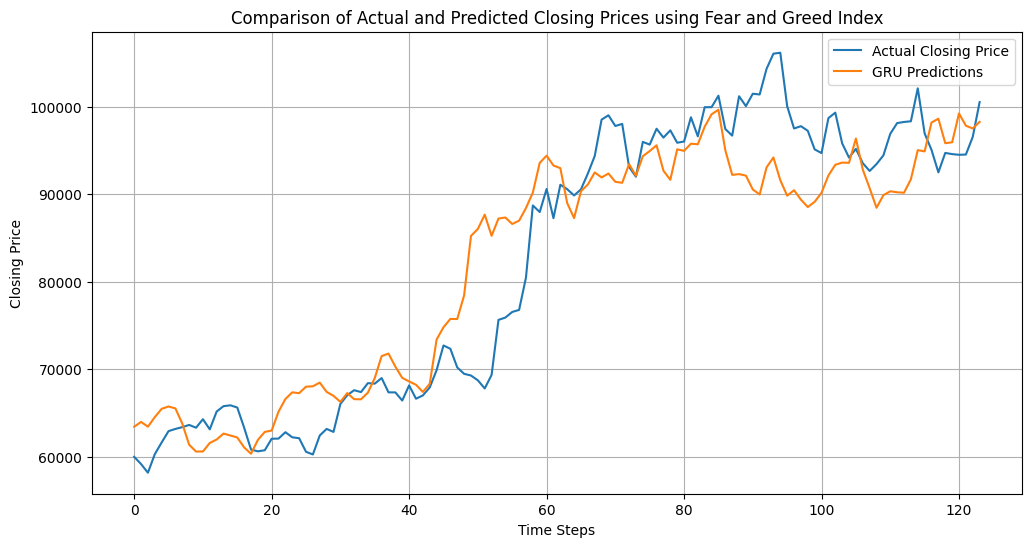

In [73]:
# prompt: plot gru_predictions test_data closing_price to make a comparison of the two series, both in the same graph after rescaling the closing prices to their original values for the same time interval

# Assuming 'gru_predictions', 'test_data', and 'scaler' are defined as in your provided code.

# Extract the actual closing prices from the test data and inverse transform them
actual_closing_prices = scaler.inverse_transform(test_data[['closing_price', 'galaxy_score']].values)[:, 0]

# Ensure the lengths of the predictions and actual prices are the same.
#If gru_prediction is longer, slice it:
min_len = min(len(gru_predictions), len(actual_closing_prices))
gru_predictions = gru_predictions[:min_len]
actual_closing_prices = actual_closing_prices[:min_len]

# Plot the predictions and actual prices
plt.figure(figsize=(12, 6))
plt.plot(actual_closing_prices, label='Actual Closing Price')
plt.plot(gru_predictions, label='GRU Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.title('Comparison of Actual and Predicted Closing Prices using Fear and Greed Index')
plt.legend()
plt.grid(True)
plt.show()


### Google Trends

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(matrix2, test_size=0.2, shuffle=False) # Use train_test_split for splitting
print(train_data.shape)
test_data.shape

(538, 8)


(135, 8)

In [ ]:
# prompt:  now lets train a GRU model on train_data to forecast closing_prices using fear_greed_index as exogenous variable

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Assuming train_data is your DataFrame with 'closing_price' and 'fear_greed_index'
# Prepare the data for the GRU model

# 1. Scale the data
scaler = MinMaxScaler()
train_data[['closing_price', 'Bitcoin_Normalized']] = scaler.fit_transform(train_data[['closing_price', 'Bitcoin_Normalized']])


# 2. Create sequences for the GRU
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length, 0]  # Predict closing price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10 # Example sequence length. Adjust as needed
X_train, y_train = create_sequences(train_data[['closing_price', 'Bitcoin_Normalized']].values, seq_length)

# 3. Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(units=50))
model.add(Dense(units=1))  # Output layer for closing price prediction

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the GRU model
model.fit(X_train, y_train, epochs=50, batch_size=32) # Adjust epochs and batch size as needed

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1463
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0021
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0016
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0017
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0015
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0014
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0014
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0017
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0013
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0014
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012
Epoc

In [ ]:
# prompt: now lets do the predictions with the gru on test_data and evaluate the results with rmse

# Assuming test_data is your DataFrame and the GRU model is already trained.
# Also, assuming 'scaler' is the MinMaxScaler used for training data.

# 1. Prepare the test data
test_data[['closing_price', 'Bitcoin_Normalized']] = scaler.transform(test_data[['closing_price', 'Bitcoin_Normalized']])

# 2. Create sequences for the test data
X_test, y_test = create_sequences(test_data[['closing_price', 'Bitcoin_Normalized']].values, seq_length)

# 3. Make predictions
gru_predictions = model.predict(X_test)

# 4. Inverse transform the predictions to the original scale
# Fix: Adjust the slicing of test_data[['fear_greed_index']] to match gru_predictions shape
gru_predictions = scaler.inverse_transform(np.concatenate((gru_predictions, test_data[['Bitcoin_Normalized']].iloc[seq_length:seq_length + len(gru_predictions)].values), axis=1))[:,0]


# 5. Evaluate the model (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, gru_predictions))

print(f"GRU RMSE: {rmse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step
GRU RMSE: 84908.52275390511


# Step 6: Wavelet Analysis

## matrix1 upload

In [1]:
# prompt: UPLOAD THE csv Bitcoin (BTC) 27mar2023-30gen2025 SANTIMENT from my drive at https://drive.google.com/drive/folders/1lQPvAvh4wthmwDpXeVx0qbF2pqaenjeW

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving matrix1.csv to matrix1.csv
User uploaded file "matrix1.csv" with length 101301 bytes


In [2]:
import pandas as pd
from google.colab import files

matrix2 = pd.read_csv('matrix1.csv')
matrix2.head()

date  closing_price  fear_greed_index  pageviews  \
0  2021-06-18   35787.246094              25.0      18044   
1  2021-06-19   35615.871094              23.0      15534   
2  2021-06-20   35698.296875              21.0      15696   
3  2021-06-21   31676.693359              23.0      19225   
4  2021-06-22   32505.660156              10.0      21093   

   ITB Sentiment Score  Bitcoin_Normalized  galaxy_score  
0            -0.638211           26.707843            61  
1            -0.592391           24.279857            71  
2            -0.613527           27.921836            58  
3            -0.671053           21.566434            67  
4            -0.738791           29.653846            72

In [3]:
matrix2.describe()

closing_price  fear_greed_index     pageviews  ITB Sentiment Score  \
count    1314.000000       1314.000000   1314.000000          1314.000000   
mean    43148.441105         48.134872  13410.456621            -0.443808   
std     21023.570489         21.251884   7264.047519             0.241174   
min     15787.284180          6.000000   4785.000000            -0.896174   
25%     26678.235840         27.000000   8440.250000            -0.594224   
50%     39453.376953         50.000000  10781.500000            -0.484486   
75%     59117.727539         69.000000  16196.500000            -0.356822   
max    106146.265625         94.000000  83841.000000             0.748627   

       Bitcoin_Normalized  galaxy_score  
count         1314.000000   1314.000000  
mean            15.598462     57.017504  
std              6.520249     12.966434  
min              7.018147     40.000000  
25%             11.011242     44.000000  
50%             13.713876     58.000000  
75%             18.623914     70.000000  
max             71.888112     89.000000

In [4]:
!pip install pyleoclim

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.1/656.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=40f63fc5a4ad81a284db782ff9a2e9c1d5ad44fe766cf9b69586295b50c6c508
  Stored in directory: /r

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pyleoclim as pyleo
import numpy as np

## BTC closing prices Wavelet

Differenzio i prezzi

NaNs have been detected and dropped.
Time axis values sorted in ascending order


(<Figure size 1000x800 with 2 Axes>,
 <Axes: title={'center': 'Closing Price scalogram (CWT)'}, xlabel='Time [unit]', ylabel='Scale [unit]'>)

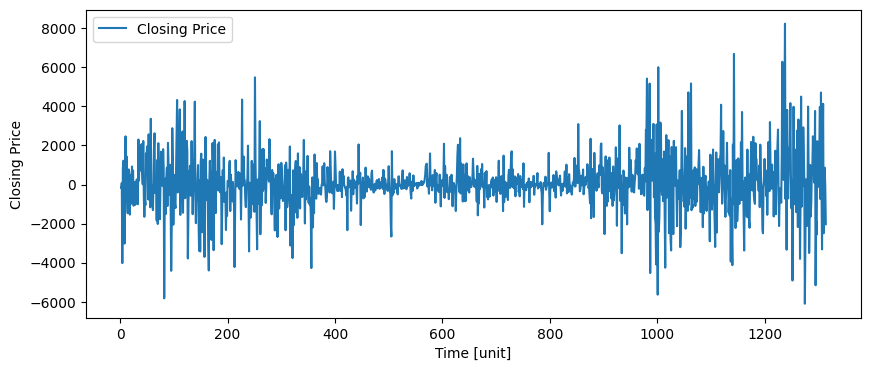

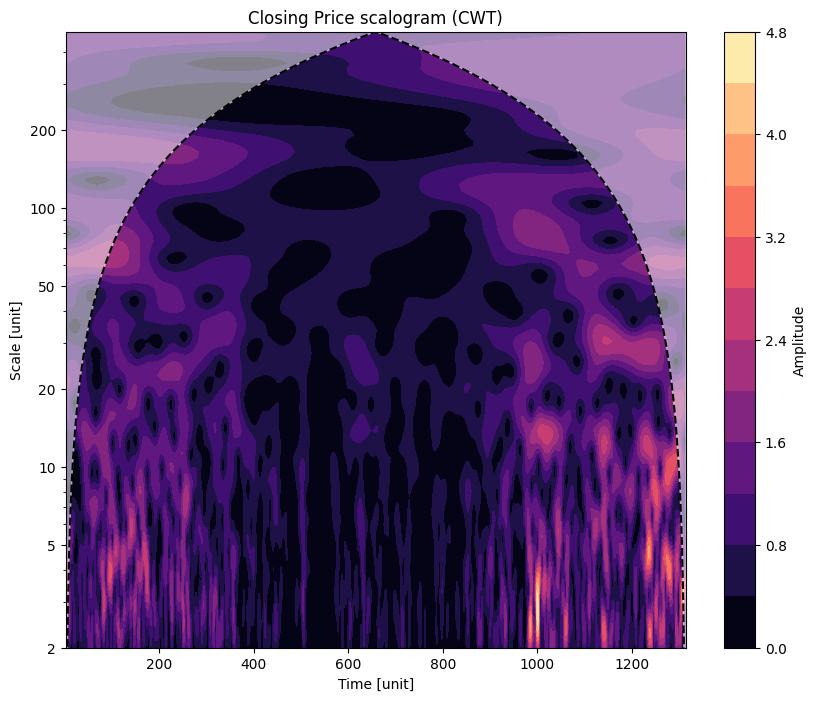

In [6]:
# prompt: do this for matrix2 cosing_price: # Create a new column 'time' with values from 1 to 2555
# btc_log_return['time'] = range(1, len(btc_log_return) + 1)
# # Now btc_log_return has a 'time' column you can use with pyleoclim
# btc_ts = pyleo.Series(
#     time=btc_log_return['time'],  # Use the new 'time' column
#     value=btc_log_return['log_return'],
#     time_name='Time',  # Changed to 'Time'
#     value_name='Log Return',
#     time_unit='unit', # Changed to a generic unit as 'days' might not apply
#     label='BTC Log Return'
# )
# btc_ts.plot()
# btc_ts

# Assuming 'matrix2' DataFrame is already loaded and 'closing_price' column exists.
# Also assuming 'pyleoclim' is already installed: !pip install pyleoclim

# Create a new column 'time' with values from 1 to the length of the 'closing_price' data.
matrix2['time'] = range(1, len(matrix2) + 1)

# Create a pyleoclim Series object for 'closing_price'
closing_price_ts = pyleo.Series(
    time=matrix2['time'],
    value=matrix2['closing_price'].diff(),
    time_name='Time',
    value_name='Closing Price',
    time_unit='unit',  # Using a generic time unit
    label='Closing Price'
)

# Plot the closing price time series
closing_price_ts.plot()
closing_price_ts

# Analyze time series resolution
#closing_price_ts.resolution().dashboard()

# Perform wavelet analysis
closing_price_scalogram = closing_price_ts.wavelet()
closing_price_scalogram.plot()

## F&G Index

NaNs have been detected and dropped.
Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [unit]', ylabel='...'>)

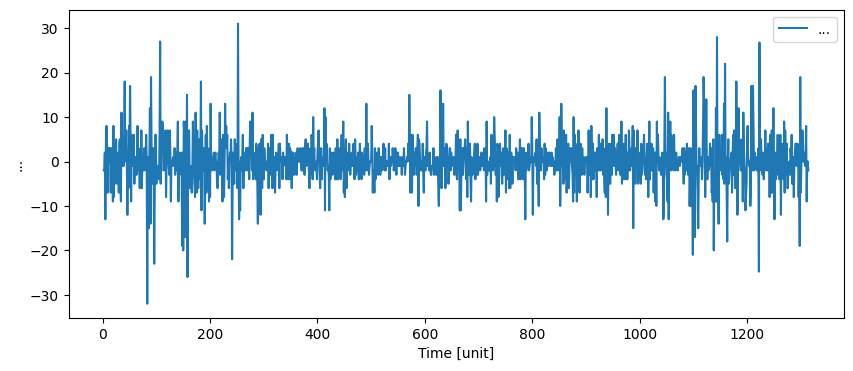

In [7]:
fng_ts = pyleo.Series(
    time=matrix2['time'],
    value=matrix2['fear_greed_index'].diff(),
    time_name='Time',  # Changed to 'Time'
    value_name='...',
    time_unit='unit', # Changed to a generic unit as 'days' might not apply
    label='...'
)
fng_ts.plot()

(<Figure size 1000x800 with 2 Axes>,
 <Axes: title={'center': '... scalogram (CWT)'}, xlabel='Time [unit]', ylabel='Scale [unit]'>)

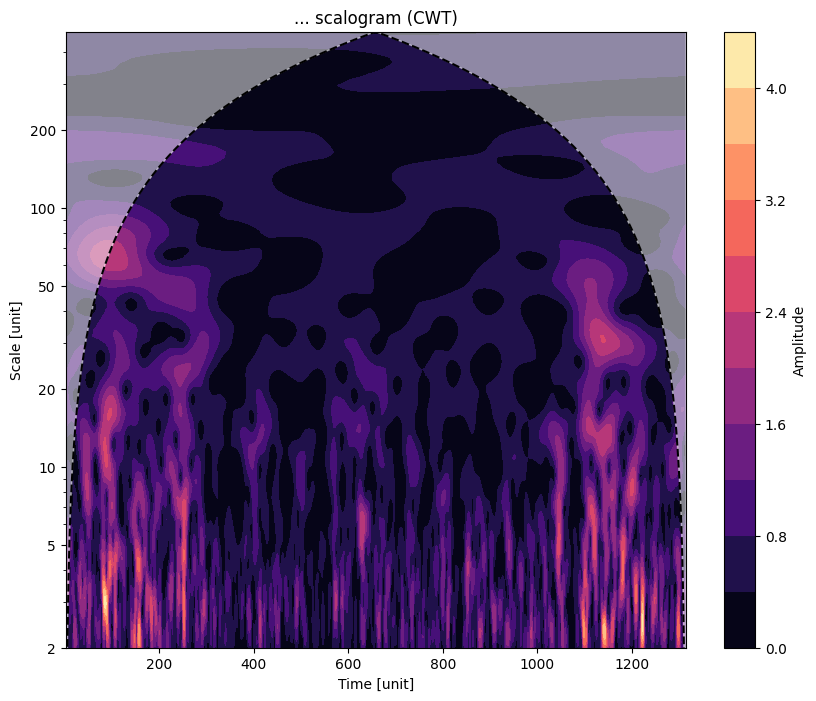

In [8]:
# Analyze time series resolution
#fng_ts.resolution().dashboard()

# Perform wavelet analysis
fng_scalogram = fng_ts.wavelet()
fng_scalogram.plot()

In [9]:
btc_ts=closing_price_ts

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='time [unit]', ylabel='value'>)

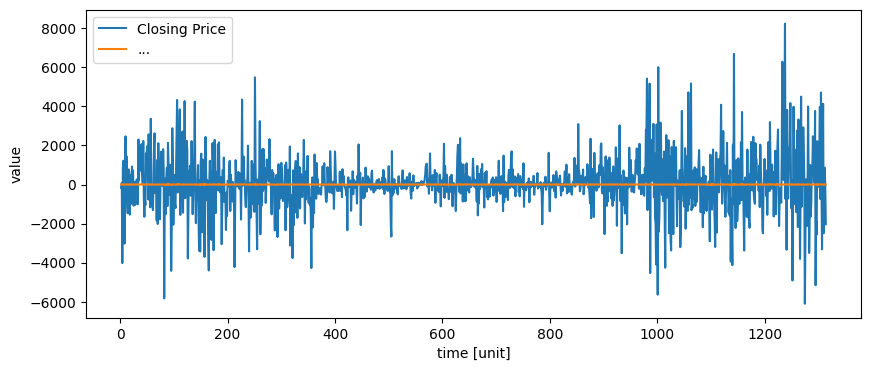

In [10]:
ms = pyleo.MultipleSeries([btc_ts,fng_ts])
ms.plot()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='time [unit]', ylabel='value'>)

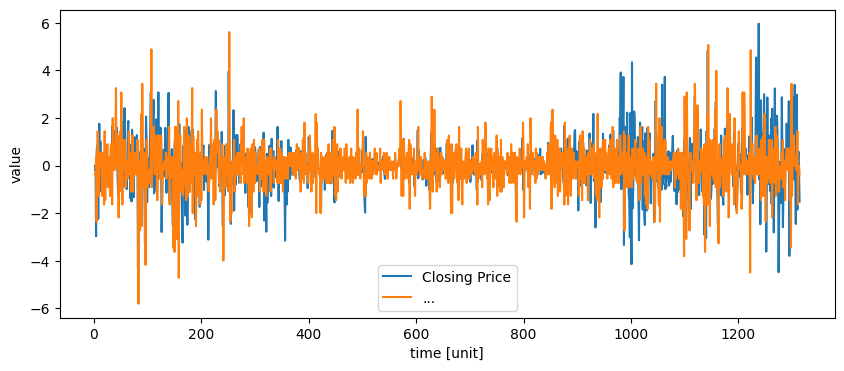

In [11]:
ms.standardize().plot()

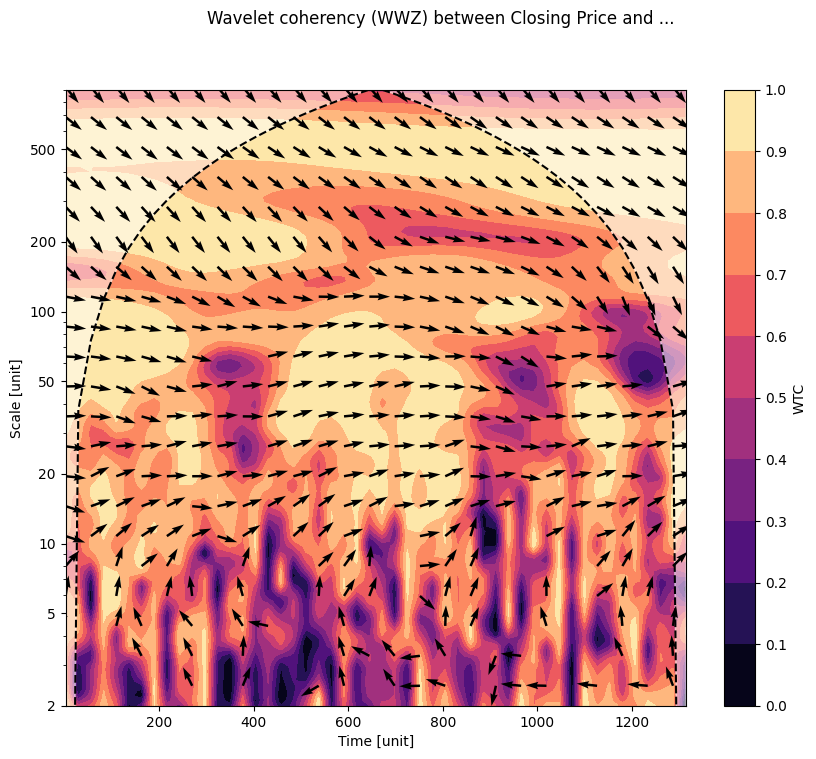

In [12]:
coh = btc_ts.wavelet_coherence(fng_ts,method='wwz')
fig, ax = coh.plot()

In [13]:
coh.phase_stats(scales=[80,100])

Results(mean_angle=-0.2378911225841989, kappa=17.46909796942924, sigma=0.24284508743836328, kappa_hi=181.77177964511398, sigma_lo=0.07427393562815733)

In [14]:
coh_sig = coh.signif_test(method='CN',number=20)

Performing wavelet coherence on surrogate pairs: 100%|██████████| 20/20 [08:43<00:00, 26.15s/it]


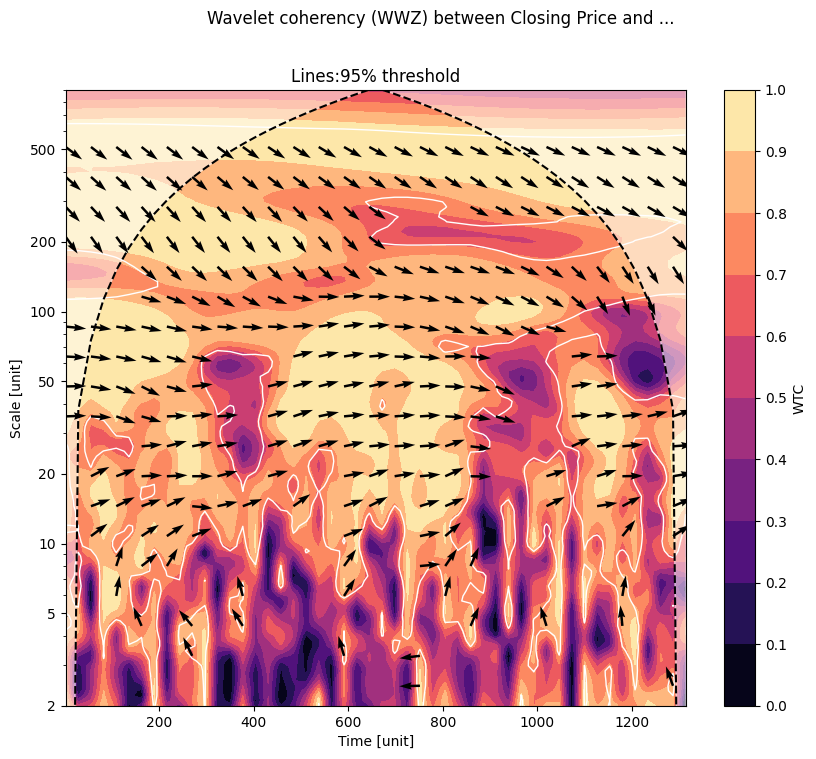

In [19]:
fig, ax = coh_sig.plot()

## Lunar crush

NaNs have been detected and dropped.
Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [unit]', ylabel='...'>)

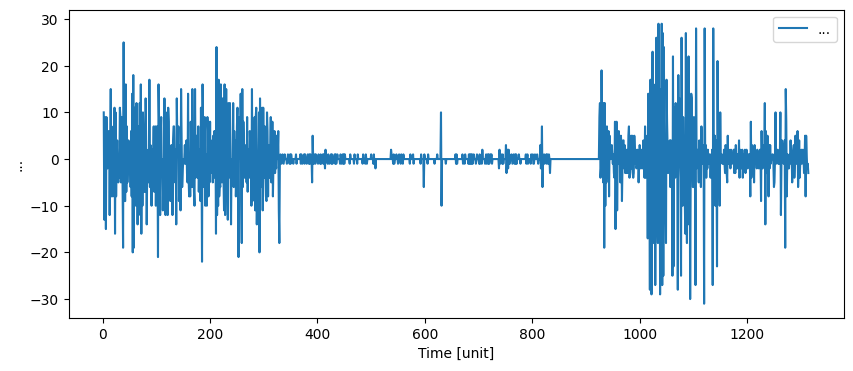

In [21]:
galaxy_ts = pyleo.Series(
    time=matrix2['time'],
    value=matrix2['galaxy_score'].diff(),
    time_name='Time',  # Changed to 'Time'
    value_name='...',
    time_unit='unit', # Changed to a generic unit as 'days' might not apply
    label='...'
)
galaxy_ts.plot()

(<Figure size 1000x800 with 2 Axes>,
 <Axes: title={'center': '... scalogram (CWT)'}, xlabel='Time [unit]', ylabel='Scale [unit]'>)

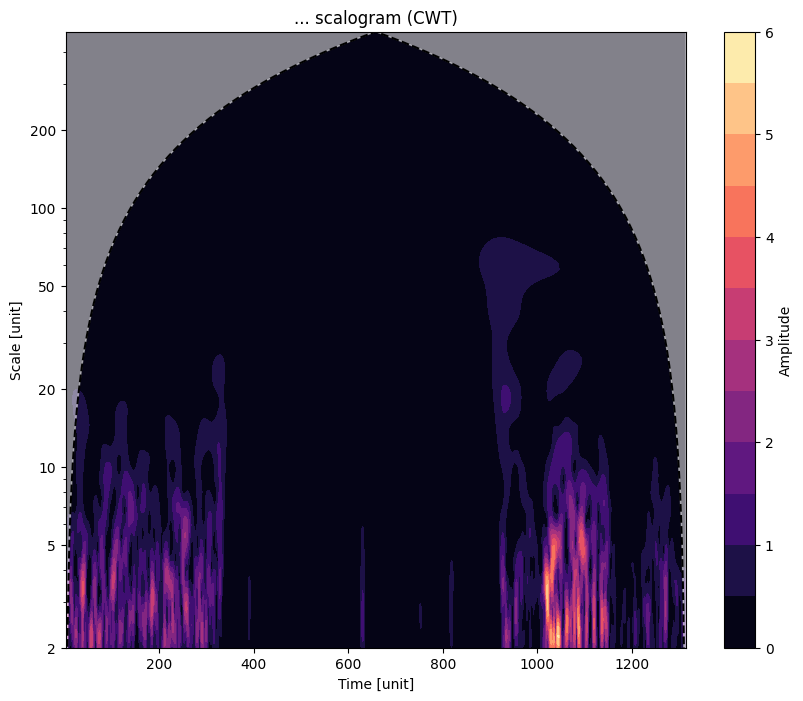

In [22]:
# Analyze time series resolution
#fng_ts.resolution().dashboard()

# Perform wavelet analysis
galaxy_scalogram = galaxy_ts.wavelet()
galaxy_scalogram.plot()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='time [unit]', ylabel='value'>)

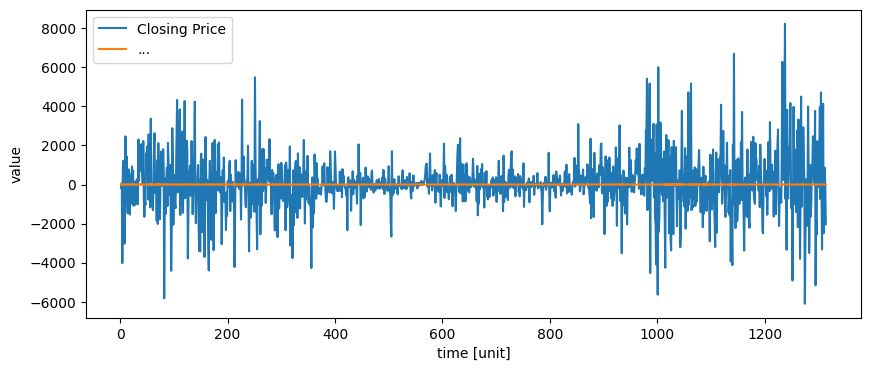

In [23]:
ms = pyleo.MultipleSeries([btc_ts,galaxy_ts])
ms.plot()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='time [unit]', ylabel='value'>)

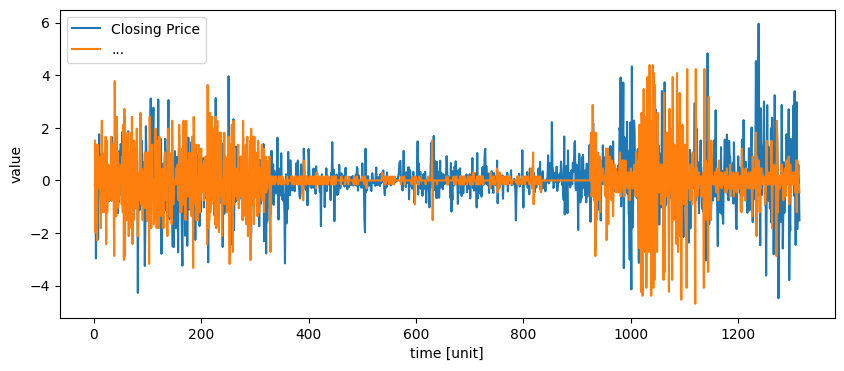

In [24]:
ms.standardize().plot()

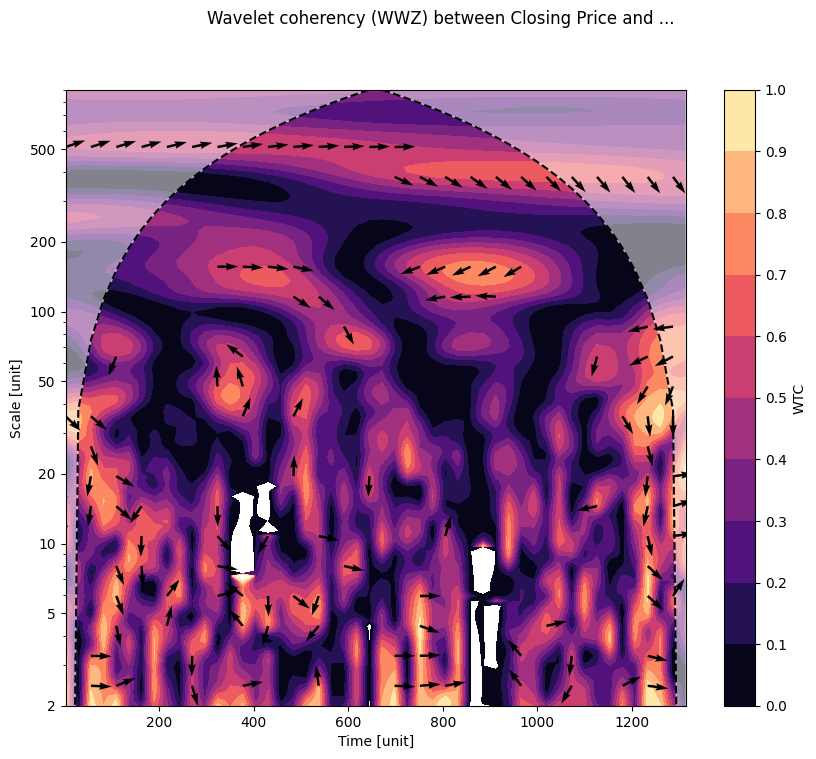

In [25]:
coh = btc_ts.wavelet_coherence(galaxy_ts,method='wwz')
fig, ax = coh.plot()

Ma che figura è??????????? è come se andasse fuori scala...

In [26]:
coh.phase_stats(scales=[80,100])

Results(mean_angle=-2.642249081992299, kappa=0.9015308163853444, sigma=1.333308027949621, kappa_hi=0.767299638880129, sigma_lo=1.4329232010548527)

In [27]:
coh_sig = coh.signif_test(method='CN',number=20)

Performing wavelet coherence on surrogate pairs: 100%|██████████| 20/20 [09:00<00:00, 27.02s/it]


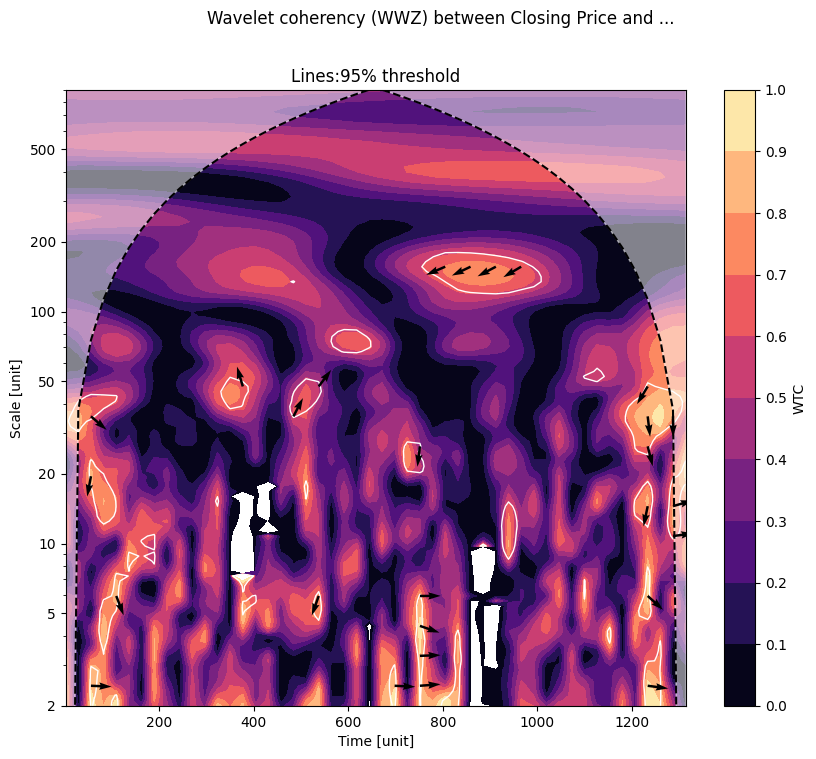

In [28]:
fig, ax = coh_sig.plot()

## Google Trends Index

NaNs have been detected and dropped.
Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [unit]', ylabel='...'>)

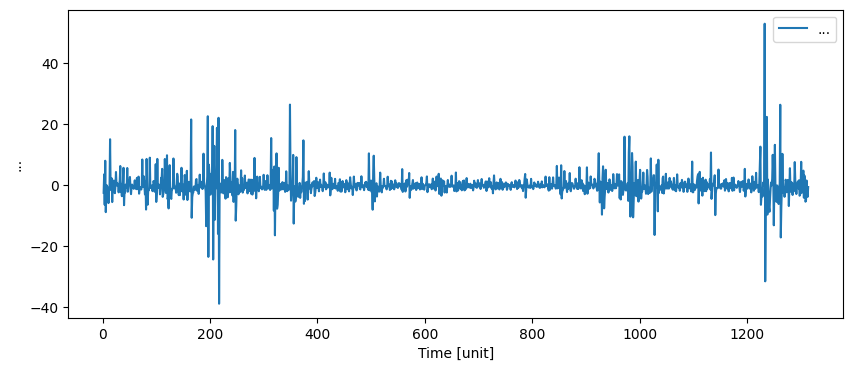

In [29]:
google_ts = pyleo.Series(
    time=matrix2['time'],
    value=matrix2['Bitcoin_Normalized'].diff(),
    time_name='Time',  # Changed to 'Time'
    value_name='...',
    time_unit='unit', # Changed to a generic unit as 'days' might not apply
    label='...'
)
google_ts.plot()

(<Figure size 1000x800 with 2 Axes>,
 <Axes: title={'center': '... scalogram (CWT)'}, xlabel='Time [unit]', ylabel='Scale [unit]'>)

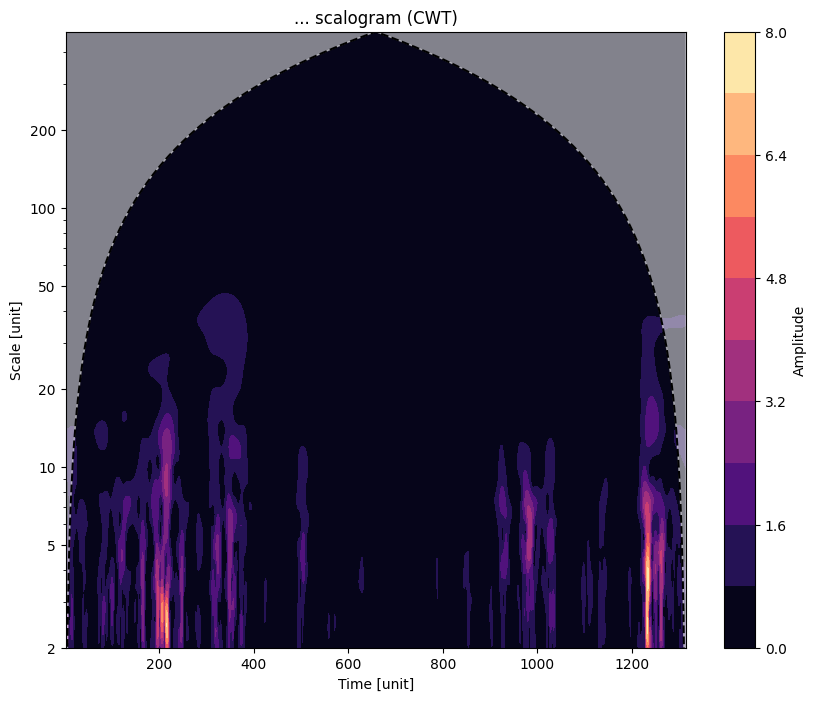

In [30]:
# Analyze time series resolution
#fng_ts.resolution().dashboard()

# Perform wavelet analysis
google_scalogram = google_ts.wavelet()
google_scalogram.plot()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='time [unit]', ylabel='value'>)

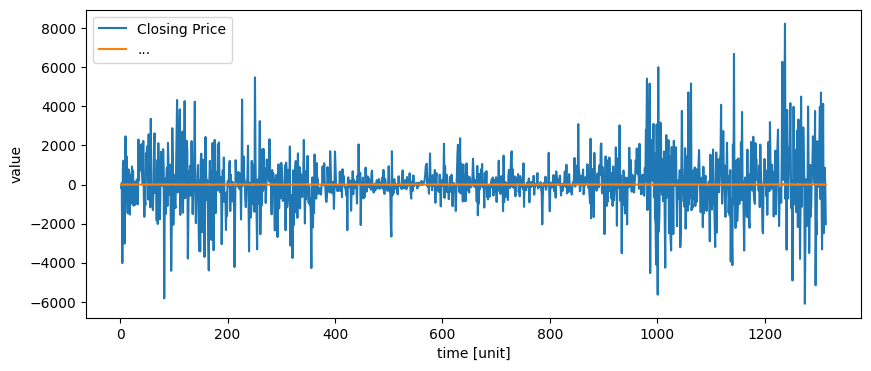

In [31]:
ms = pyleo.MultipleSeries([btc_ts,google_ts])
ms.plot()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='time [unit]', ylabel='value'>)

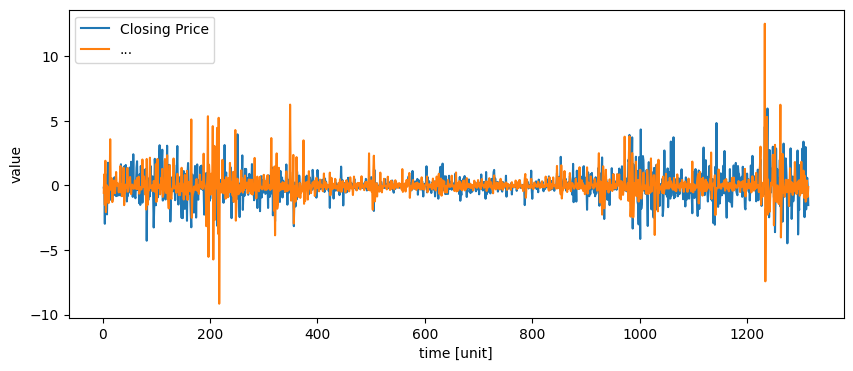

In [32]:
ms.standardize().plot()

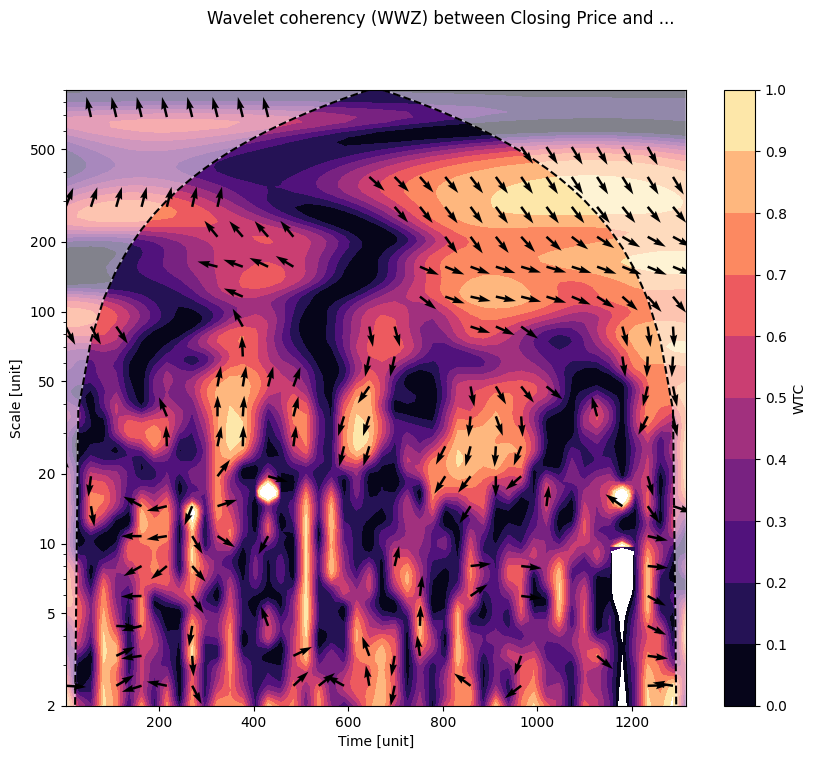

In [33]:
coh = btc_ts.wavelet_coherence(google_ts,method='wwz')
fig, ax = coh.plot()

Che sono queste zone bianche? stesso problema di Galaxy... out of range???

In [34]:
coh.phase_stats(scales=[80,100])

Results(mean_angle=-1.0132477172880683, kappa=1.3785638034214758, sigma=1.0664530625717157, kappa_hi=1.8099886509179726, sigma_lo=0.9026368713548291)

In [35]:
coh_sig = coh.signif_test(method='CN',number=20)

Performing wavelet coherence on surrogate pairs: 100%|██████████| 20/20 [09:44<00:00, 29.21s/it]


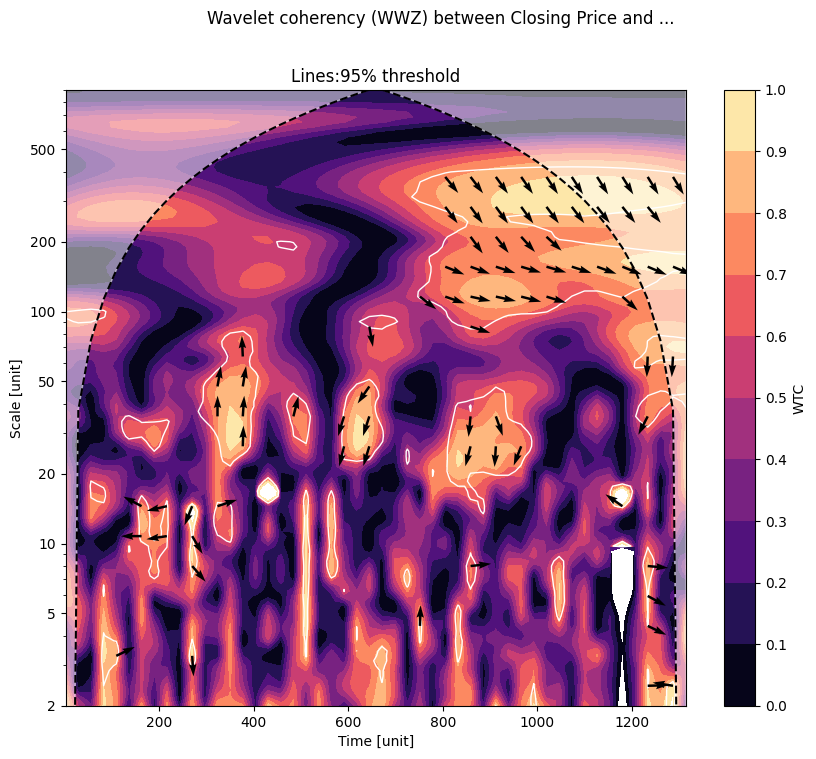

In [36]:
fig, ax = coh_sig.plot()

## Into the Block

NaNs have been detected and dropped.
Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [unit]', ylabel='...'>)

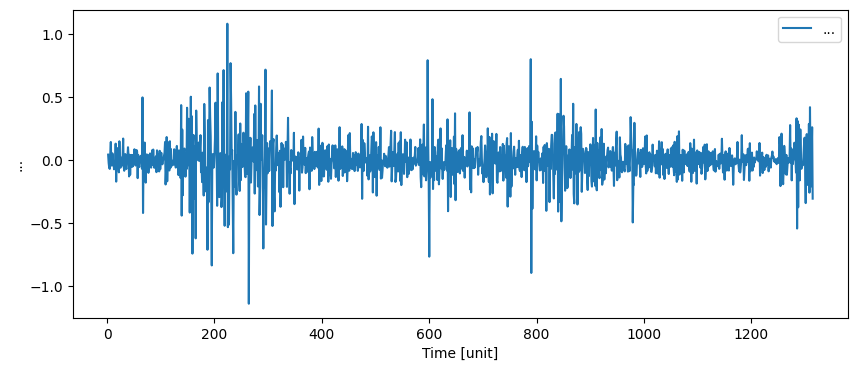

In [37]:
ITB_ts = pyleo.Series(
    time=matrix2['time'],
    value=matrix2['ITB Sentiment Score'].diff(),
    time_name='Time',  # Changed to 'Time'
    value_name='...',
    time_unit='unit', # Changed to a generic unit as 'days' might not apply
    label='...'
)

ITB_ts.plot()

(<Figure size 1000x800 with 2 Axes>,
 <Axes: title={'center': '... scalogram (CWT)'}, xlabel='Time [unit]', ylabel='Scale [unit]'>)

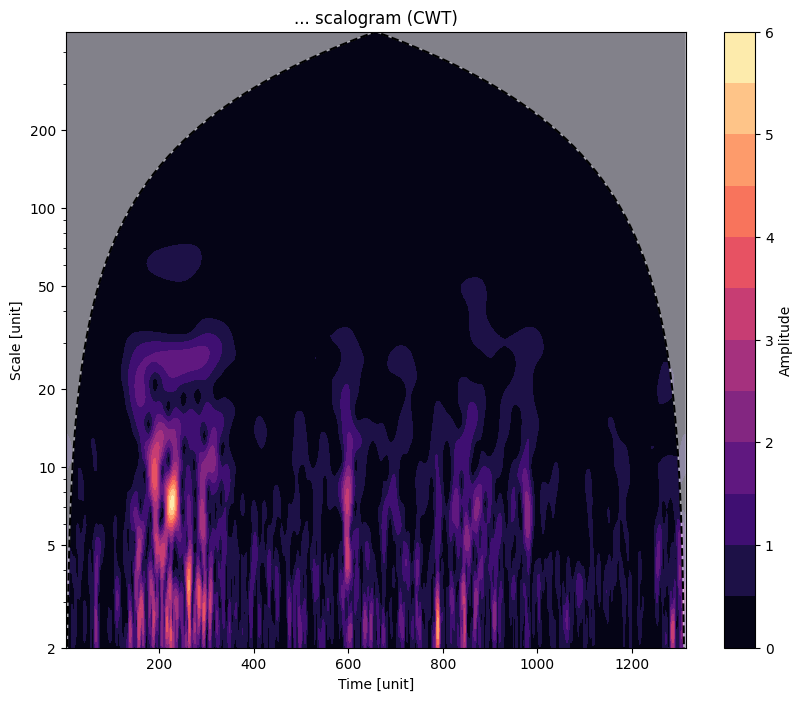

In [38]:
# Analyze time series resolution
#fng_ts.resolution().dashboard()

# Perform wavelet analysis
ITB_scalogram = ITB_ts.wavelet()
ITB_scalogram.plot()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='time [unit]', ylabel='value'>)

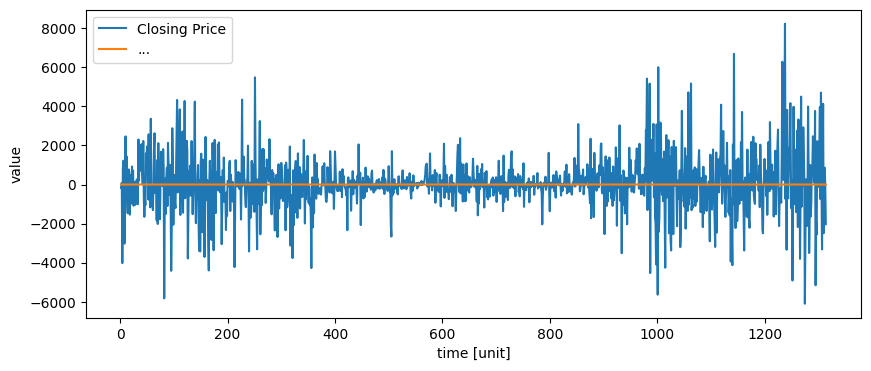

In [39]:
ms = pyleo.MultipleSeries([btc_ts,ITB_ts])
ms.plot()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='time [unit]', ylabel='value'>)

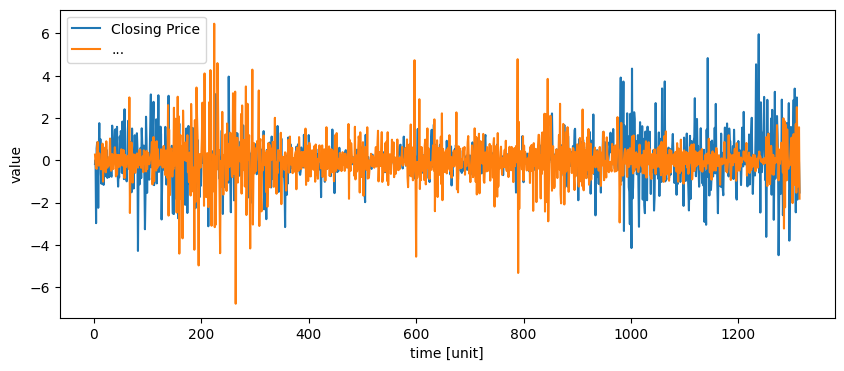

In [40]:
ms.standardize().plot()

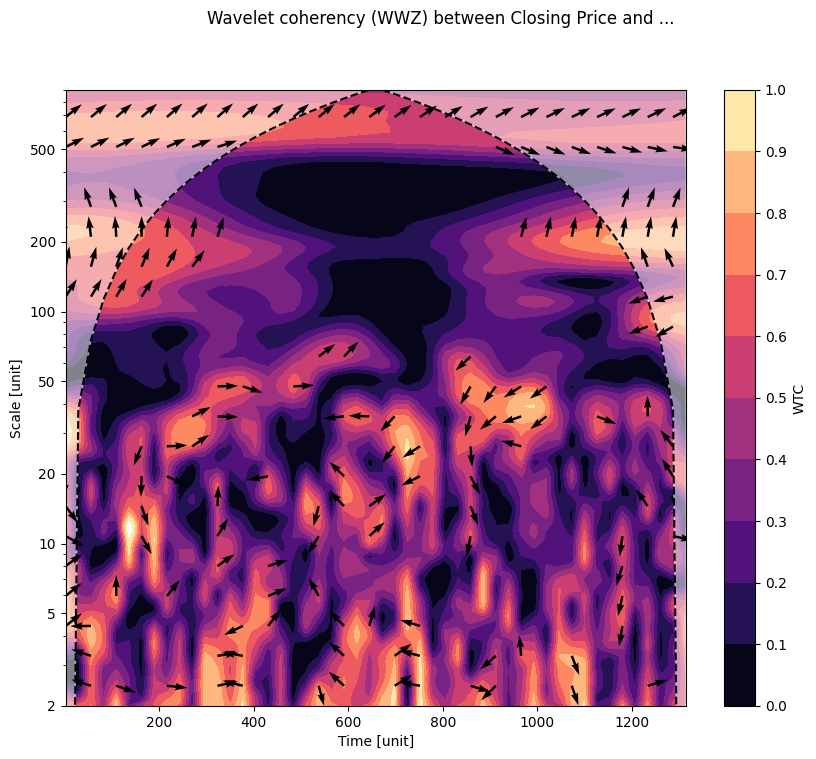

In [42]:
coh = btc_ts.wavelet_coherence(ITB_ts,method='wwz')
fig, ax = coh.plot()

Questo è ok..

In [43]:
coh.phase_stats(scales=[80,100])

Results(mean_angle=-0.9385482503257994, kappa=0.024988713033513795, sigma=2.9605932732054554, kappa_hi=1.0553751809547913, sigma_lo=1.2334200492673832)

In [44]:
coh_sig = coh.signif_test(method='CN',number=20)

Performing wavelet coherence on surrogate pairs: 100%|██████████| 20/20 [08:31<00:00, 25.59s/it]


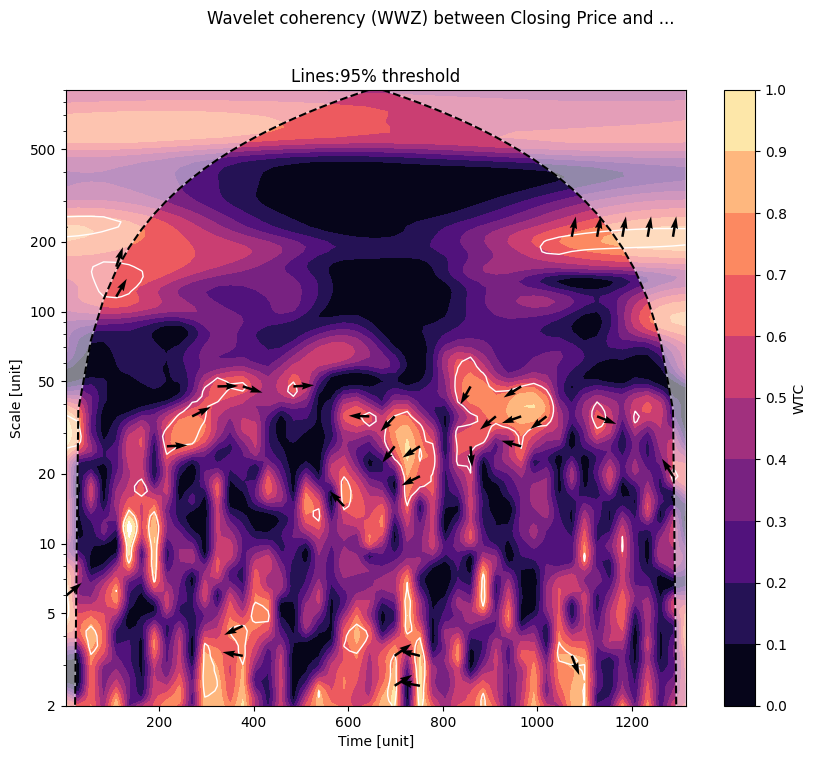

In [45]:
fig, ax = coh_sig.plot()